In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [62]:
data = pd.read_csv("건강조사_2012~2023.csv")

In [3]:
data

mod_d          ID       ID_fam  year  region  town_t  apt_t  \
0      b'2022.03.08'         NaN  b'A1349783'  2012     1.0     1.0    1.0   
1      b'2022.03.08'         NaN  b'A1349783'  2012     1.0     1.0    1.0   
2      b'2022.03.08'         NaN  b'A1349783'  2012     1.0     1.0    1.0   
3      b'2022.03.08'         NaN  b'A1349779'  2012     1.0     1.0    1.0   
4      b'2022.03.08'         NaN  b'A1349779'  2012     1.0     1.0    1.0   
...              ...         ...          ...   ...     ...     ...    ...   
91023    2024.12.10.  YA84382303     YA843823  2023     1.0     1.0    2.0   
91024    2024.12.10.  YA84208301     YA842083  2023     1.0     1.0    2.0   
91025    2024.12.10.  YA84382304     YA843823  2023     1.0     1.0    2.0   
91026    2024.12.10.  YA84410601     YA844106  2023     1.0     1.0    2.0   
91027    2024.12.10.  YA84384301     YA843843  2023     1.0     1.0    2.0   

           psu  sex   age  age_month  incm  ho_incm  incm5  ho_incm5  edu  \
0      b'A134'  2.0  19.0        NaN   3.0      3.0    4.0       4.0  3.0   
1      b'A134'  2.0  44.0        NaN   3.0      3.0    4.0       4.0  4.0   
2      b'A134'  1.0  48.0        NaN   3.0      3.0    3.0       4.0  3.0   
3      b'A134'  1.0  45.0        NaN   3.0      4.0    4.0       4.0  3.0   
4      b'A134'  2.0  47.0        NaN   3.0      4.0    4.0       4.0  2.0   
...        ...  ...   ...        ...   ...      ...    ...       ...  ...   
91023     YA84  2.0   9.0        NaN   2.0      3.0    3.0       3.0  1.0   
91024     YA84  1.0  75.0        NaN   3.0      2.0    4.0       2.0  1.0   
91025     YA84  1.0   9.0        NaN   2.0      3.0    3.0       3.0  1.0   
91026     YA84  2.0  61.0        NaN   2.0      2.0    2.0       3.0  3.0   
91027     YA84  2.0  50.0        NaN   2.0      2.0    2.0       3.0  4.0   

       occp         wt_hs      wt_itvex         wt_oe        wt_ntr  \
0       7.0   6328.796718   7753.113108           NaN   8289.914519   
1       1.0   6328.796718   5125.933713           NaN   5040.418984   
2       5.0   6328.796718   9384.817359           NaN  13656.358598   
3       3.0   6328.796718  14077.226038           NaN           NaN   
4       3.0   6328.796718  12393.346024           NaN  19104.277429   
...     ...           ...           ...           ...           ...   
91023   NaN  11460.881778  12605.334818  12175.772093  12605.334818   
91024   7.0  11460.881778  11633.543550  11740.649472  11581.903830   
91025   NaN  11460.881778  15169.783423  12493.157722  17667.076039   
91026   6.0  11460.881778  12826.112033  11042.440313  12973.681626   
91027   7.0  11460.881778  11151.948250  18432.774553  11267.698823   

             wt_tot       wt_oent  kstrata  cfam  genertn  allownc  house  \
0      12868.977377           NaN    512.0   5.0      4.0     20.0    2.0   
1       7492.375534           NaN    512.0   5.0      4.0     20.0    2.0   
2      17544.992243           NaN    512.0   5.0      4.0     20.0    2.0   
3               NaN           NaN    512.0   3.0      4.0     20.0    2.0   
4      21590.625741           NaN    512.0   3.0      4.0     20.0    2.0   
...             ...           ...      ...   ...      ...      ...    ...   
91023  11767.917247  11783.992783    101.0   4.0      4.0     20.0    2.0   
91024  11479.203518  11934.223778    101.0   3.0      4.0     20.0    1.0   
91025  12238.551756  12170.107712    101.0   4.0      4.0     20.0    2.0   
91026  10450.494228  11116.588032    101.0   3.0      4.0     20.0    1.0   
91027  13039.787224  18903.364294    101.0   4.0      4.0     20.0    3.0   

       live_t  ainc_unit1  ainc_1        ainc  marri_1  marri_2  fam_rela  \
0         3.0         1.0  6200.0  516.666667      2.0     88.0       3.0   
1         3.0         1.0  6200.0  516.666667      1.0      1.0       2.0   
2         3.0         1.0  6200.0  516.666667      1.0      1.0       1.0   
3         3.0         1.0  5760.0  480.000000      1.0      1.0    

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 예시: 맑은 고딕으로 설정 (Windows 환경 시)
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import pandas as pd

# 남기고 싶은 컬럼 리스트
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg','DE1_pt', 'DI1_pt'
]

# 원래 데이터프레임이 df일 때
data = data[columns_to_keep]

**연도별 질병클래스 분포 확인**

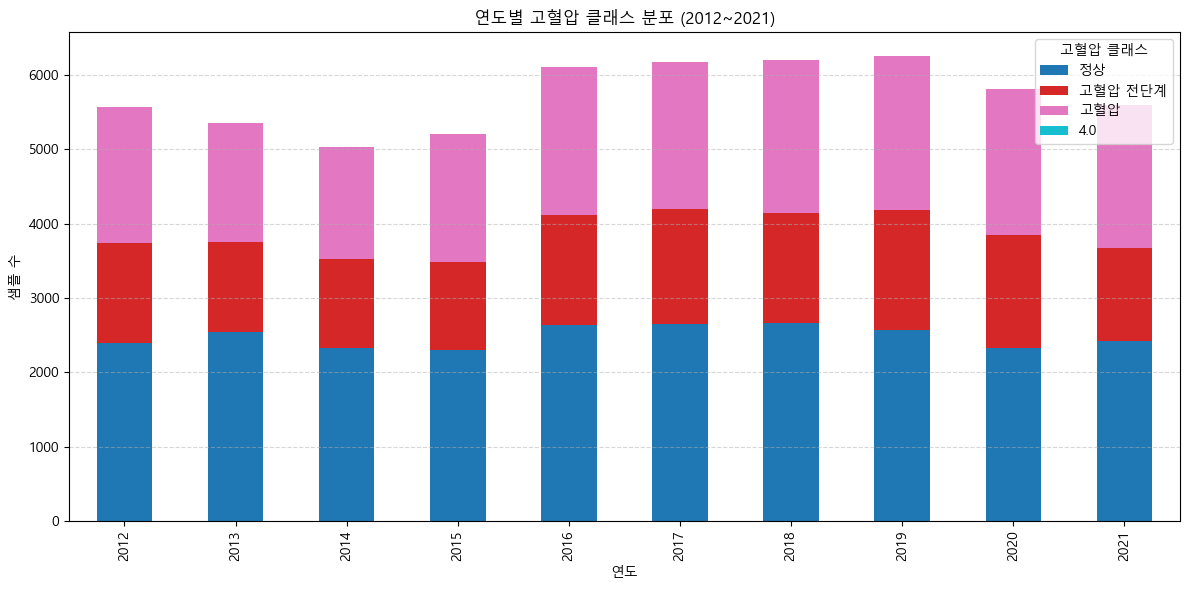

HE_HP    정상  고혈압 전단계   고혈압  4.0
year                           
2012   2394     1341  1830    0
2013   2543     1215  1594    0
2014   2325     1201  1505    0
2015   2304     1174  1726    0
2016   2641     1469  1995    0
2017   2646     1554  1978    0
2018   2659     1480  2061    0
2019   2571     1615  2075    0
2020   2329     1520  1960    0
2021   2416     1252  1924    0


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# HE_HP 클래스 한글 라벨 매핑
label_map = {
    1: "정상",
    2: "고혈압 전단계",
    3: "고혈압"
}

# 연도별 HE_HP 분포 계산
year_class_counts = data.groupby("year")["HE_HP"].value_counts().unstack(fill_value=0)

# 클래스 컬럼 한글로 변경
year_class_counts.rename(columns=label_map, inplace=True)

# 연도 필터링 (2012~2021년)
year_class_counts = year_class_counts.loc[2012:2021]

# 스택 바차트 시각화
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("연도별 고혈압 클래스 분포 (2012~2021)")
plt.xlabel("연도")
plt.ylabel("샘플 수")
plt.legend(title="고혈압 클래스")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 수치 확인
print(year_class_counts)


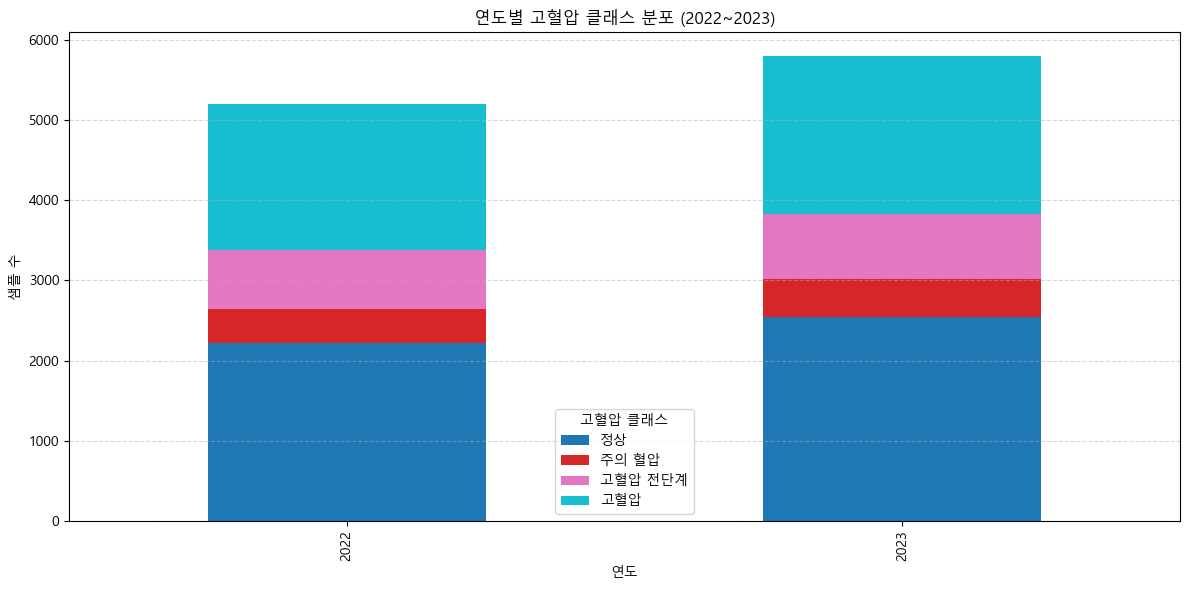

HE_HP    정상  주의 혈압  고혈압 전단계   고혈압
year                             
2022   2223    418      737  1824
2023   2549    464      815  1979


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# HE_HP 클래스 한글 라벨 매핑
label_map = {
    1: "정상",
    2: "주의 혈압",
    3: "고혈압 전단계",
    4: "고혈압"
}

# 연도별 HE_HP 분포 계산
year_class_counts = data.groupby("year")["HE_HP"].value_counts().unstack(fill_value=0)

# 클래스 컬럼 한글로 변경
year_class_counts.rename(columns=label_map, inplace=True)

# 연도 필터링 (2012~2021년)
year_class_counts = year_class_counts.loc[2022:2023]

# 스택 바차트 시각화
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("연도별 고혈압 클래스 분포 (2022~2023)")
plt.xlabel("연도")
plt.ylabel("샘플 수")
plt.legend(title="고혈압 클래스")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 수치 확인
print(year_class_counts)


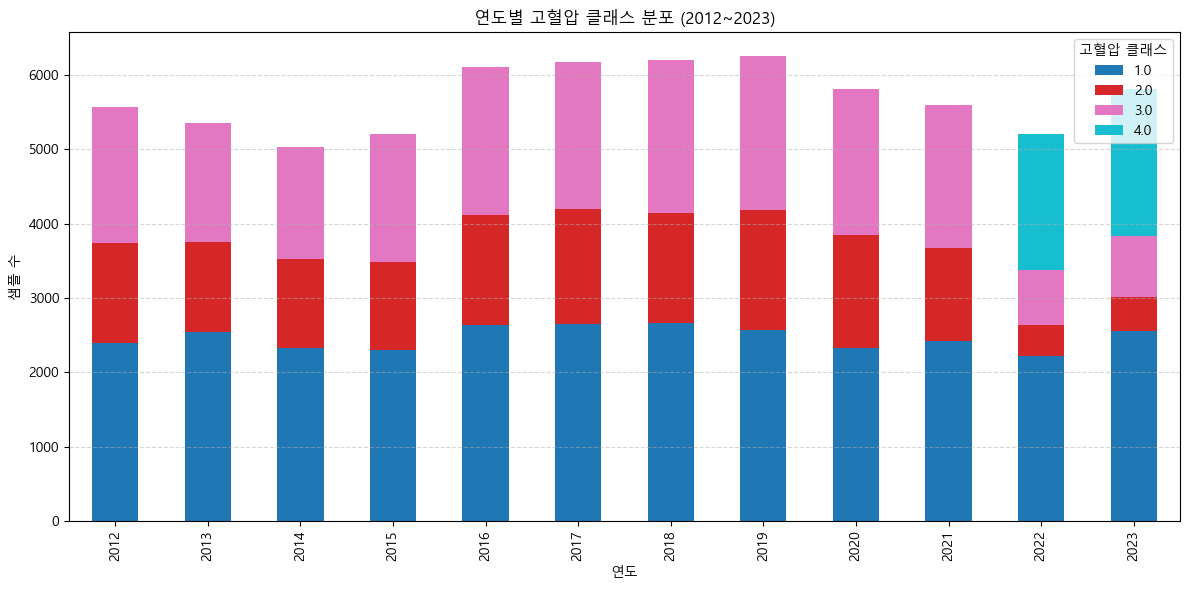

HE_HP   1.0   2.0   3.0   4.0
year                         
2012   2394  1341  1830     0
2013   2543  1215  1594     0
2014   2325  1201  1505     0
2015   2304  1174  1726     0
2016   2641  1469  1995     0
2017   2646  1554  1978     0
2018   2659  1480  2061     0
2019   2571  1615  2075     0
2020   2329  1520  1960     0
2021   2416  1252  1924     0
2022   2223   418   737  1824
2023   2549   464   815  1979


In [14]:
import pandas as pd
import matplotlib.pyplot as plt



# 연도별 HE_HP 분포 계산
year_class_counts = data.groupby("year")["HE_HP"].value_counts().unstack(fill_value=0)


# 연도 필터링 (2012~2021년)
year_class_counts = year_class_counts.loc[2012:2023]

# 스택 바차트 시각화
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("연도별 고혈압 클래스 분포 (2012~2023)")
plt.xlabel("연도")
plt.ylabel("샘플 수")
plt.legend(title="고혈압 클래스")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 수치 확인
print(year_class_counts)


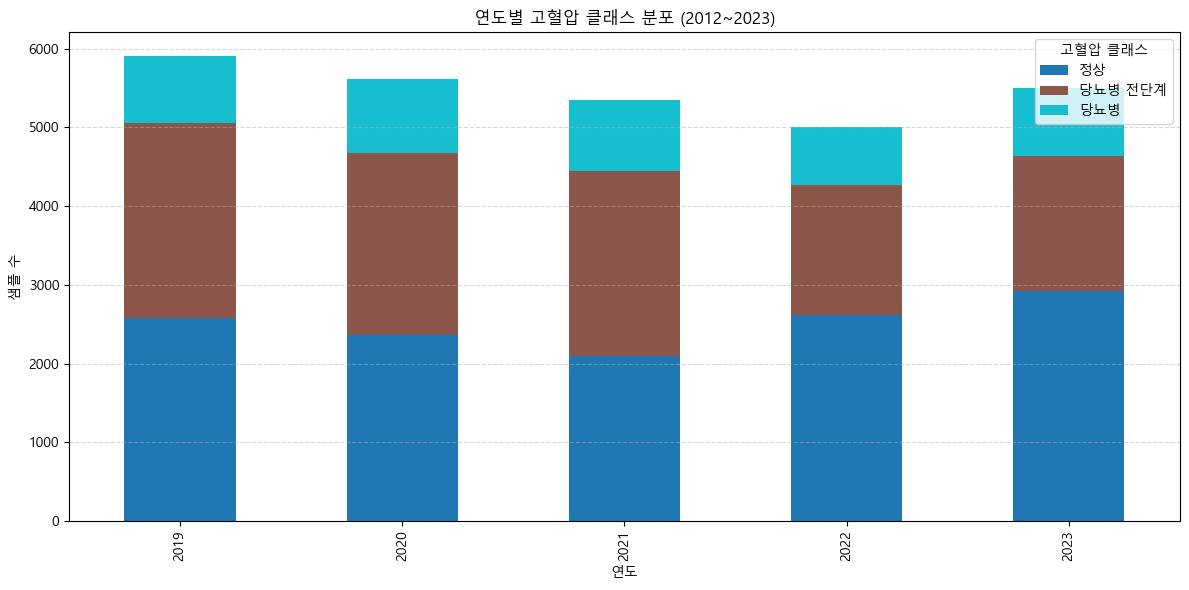

HE_DM_HbA1c    정상  당뇨병 전단계  당뇨병
year                           
2019         2583     2480  851
2020         2357     2319  936
2021         2101     2347  899
2022         2614     1655  738
2023         2925     1719  860


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# HE_HP 클래스 한글 라벨 매핑
label_map = {
    1: "정상",
    2: "당뇨병 전단계",
    3: "당뇨병"
}

# 연도별 HE_HP 분포 계산
year_class_counts = data.groupby("year")["HE_DM_HbA1c"].value_counts().unstack(fill_value=0)

# 클래스 컬럼 한글로 변경
year_class_counts.rename(columns=label_map, inplace=True)

# 연도 필터링 (2012~2021년)
year_class_counts = year_class_counts.loc[2012:2023]

# 스택 바차트 시각화
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("연도별 고혈압 클래스 분포 (2012~2023)")
plt.xlabel("연도")
plt.ylabel("샘플 수")
plt.legend(title="고혈압 클래스")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 수치 확인
print(year_class_counts)


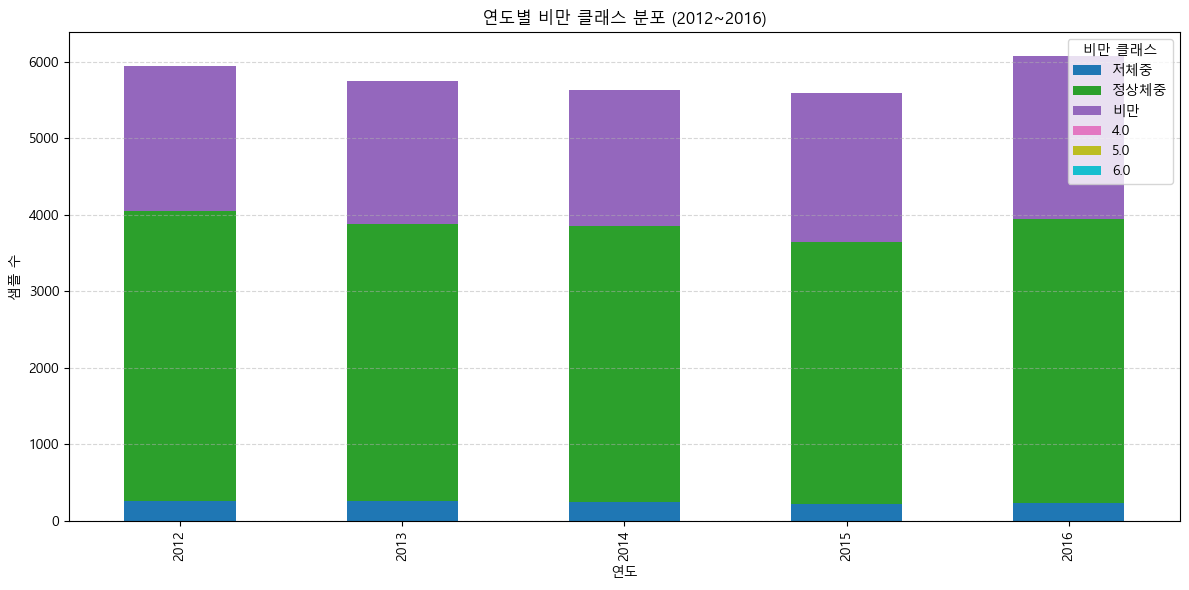

HE_obe  저체중  정상체중    비만  4.0  5.0  6.0
year                                  
2012    267  3778  1897    0    0    0
2013    257  3620  1871    0    0    0
2014    248  3609  1775    0    0    0
2015    221  3423  1948    0    0    0
2016    234  3709  2135    0    0    0


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# HE_HP 클래스 한글 라벨 매핑
label_map = {
    1: "저체중",
    2: "정상체중",
    3: "비만"
}

# 연도별 HE_HP 분포 계산
year_class_counts = data.groupby("year")["HE_obe"].value_counts().unstack(fill_value=0)

# 클래스 컬럼 한글로 변경
year_class_counts.rename(columns=label_map, inplace=True)

# 연도 필터링 (2012~2021년)
year_class_counts = year_class_counts.loc[2012:2016]

# 스택 바차트 시각화
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("연도별 비만 클래스 분포 (2012~2016)")
plt.xlabel("연도")
plt.ylabel("샘플 수")
plt.legend(title="비만 클래스")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 수치 확인
print(year_class_counts)


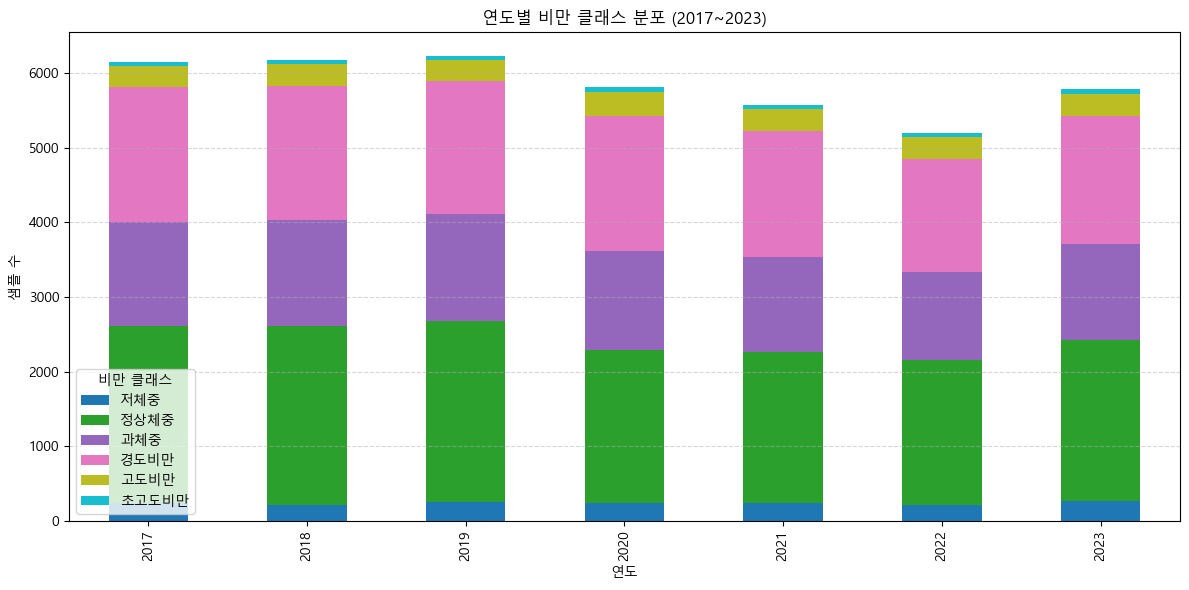

HE_obe  저체중  정상체중   과체중  경도비만  고도비만  초고도비만
year                                      
2017    244  2368  1389  1817   281     51
2018    215  2400  1413  1801   296     45
2019    249  2430  1432  1778   288     55
2020    240  2044  1330  1811   326     64
2021    244  2015  1281  1684   297     53
2022    207  1950  1175  1521   285     59
2023    264  2156  1293  1707   304     56


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# HE_HP 클래스 한글 라벨 매핑
label_map = {
    1: "저체중",
    2: "정상체중",
    3: "과체중",
    4: "경도비만",
    5: "고도비만",
    6: "초고도비만"
}

# 연도별 HE_HP 분포 계산
year_class_counts = data.groupby("year")["HE_obe"].value_counts().unstack(fill_value=0)

# 클래스 컬럼 한글로 변경
year_class_counts.rename(columns=label_map, inplace=True)

# 연도 필터링 (2012~2021년)
year_class_counts = year_class_counts.loc[2017:2023]

# 스택 바차트 시각화
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("연도별 비만 클래스 분포 (2017~2023)")
plt.xlabel("연도")
plt.ylabel("샘플 수")
plt.legend(title="비만 클래스")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 수치 확인
print(year_class_counts)


**전처리 전 후 비교**

In [69]:
data=pd.read_csv("건강조사_2012~2023.csv")

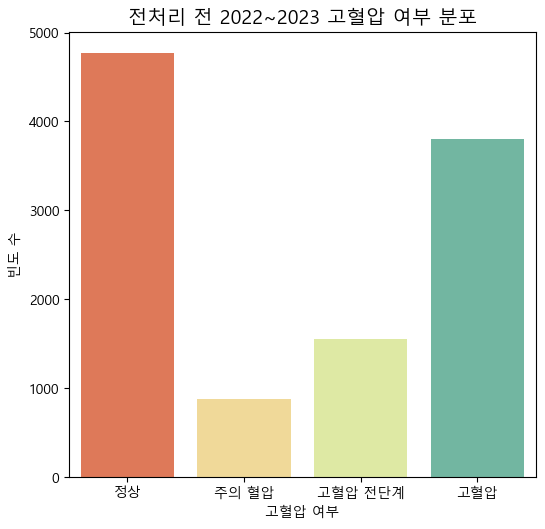

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 고혈압 클래스 한글 라벨 매핑
label_map = {
    1: "정상",
    2: "주의 혈압",
    3: "고혈압 전단계",
    4: "고혈압"
}

# ✅ 2022~2023년 데이터만 필터링
data_22_23 = data[data["year"].isin([2022, 2023])].copy()

# 한글 라벨 열 추가 (원본은 유지)
data_22_23["HE_HP_label"] = data_22_23["HE_HP"].map(label_map)

# 시각화할 변수 리스트
targets = ['HE_HP_label']
column_labels = {
    'HE_HP_label': '고혈압 여부'
}

# 서브플롯 설정 (2행 4열: 8개 칸 중 1개 사용)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# countplot 그리기
for i, var in enumerate(targets):
    sns.countplot(
        x=var,
        data=data_22_23,
        palette="Spectral",
        order=["정상", "주의 혈압", "고혈압 전단계", "고혈압"],  # 순서 고정
        ax=axes[i]
    )
    axes[i].set_title(f"전처리 전 2022~2023 {column_labels[var]} 분포", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('빈도 수')

# 사용하지 않는 subplot 숨기기
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [71]:
# 클래스 분포 확인
print(data_22_23["HE_HP"].value_counts().sort_index())

HE_HP
1.0    4772
2.0     882
3.0    1552
4.0    3803
Name: count, dtype: int64


**전처리 : 고혈압 클래스 불균형 처리**

In [89]:
data=pd.read_csv("당뇨(2~3 클래스)합침.csv")

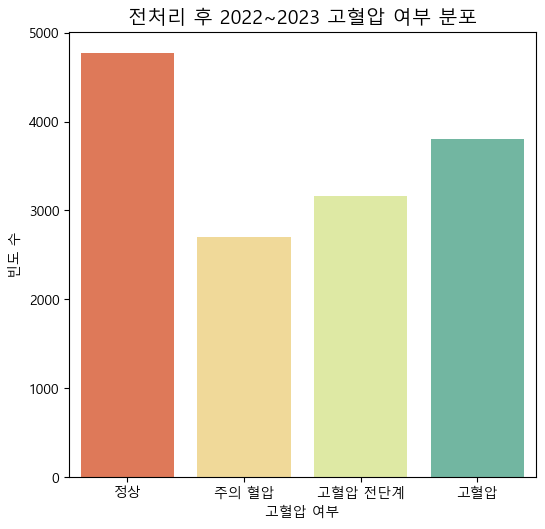

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# 고혈압 클래스 한글 라벨 매핑
label_map = {
    1: "정상",
    2: "주의 혈압",
    3: "고혈압 전단계",
    4: "고혈압"
}

# 한글 라벨 열 추가 (원본은 유지)
data["HE_HP_label"] = data["HE_HP"].map(label_map)

# 시각화할 변수 리스트
targets = ['HE_HP_label']
column_labels = {
    'HE_HP_label': '고혈압 여부'
}

# 원하는 막대 순서 지정
label_order = ["정상", "주의 혈압", "고혈압 전단계", "고혈압"]

# 서브플롯 설정 (2행 4열: 8개 칸 중 1개 사용)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# countplot 그리기
for i, var in enumerate(targets):
    sns.countplot(
        x=var,
        data=data,
        palette="Spectral",
        order=label_order,  # 순서 지정
        ax=axes[i]
    )
    axes[i].set_title(f"전처리 후 2022~2023 {column_labels[var]} 분포", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('빈도 수')

# 사용하지 않는 subplot 숨기기
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [75]:
# 클래스 분포 확인
print(data["HE_HP"].value_counts().sort_index())

HE_HP
1.0    4772
2.0    2704
3.0    3160
4.0    3803
Name: count, dtype: int64


In [76]:
# HE_HP 컬럼의 결측치 개수 계산
missing_count = data['HE_HP'].isnull().sum()

# 전체 HE_HP 컬럼의 데이터 개수 계산
total_count = len(data['HE_HP'])

# 결측치 비율 계산
missing_percentage = (missing_count / total_count) * 100

print(f"고혈압 컬럼의 총 데이터 개수: {total_count}개")
print(f"고혈압 컬럼의 결측치(NaN) 개수: {missing_count}개")
print(f"고혈압 컬럼의 결측치 비율: {missing_percentage:.2f}%")

고혈압 컬럼의 총 데이터 개수: 16624개
고혈압 컬럼의 결측치(NaN) 개수: 2185개
고혈압 컬럼의 결측치 비율: 13.14%


In [77]:
import pandas as pd
import numpy as np

# --- 전체 HE_HP 컬럼의 결측치 비율 계산 ---
missing_count_all = data['HE_HP'].isnull().sum()
total_count_all = len(data['HE_HP'])
missing_percentage_all = (missing_count_all / total_count_all) * 100

print(f"**전체 고혈압 컬럼 (`HE_HP`) 결측치 현황:**")
print(f"  총 데이터 개수: {total_count_all}개")
print(f"  결측치(NaN) 개수: {missing_count_all}개")
print(f"  결측치 비율: {missing_percentage_all:.2f}%")
print("-" * 30)

# --- DI1_pt=8인 행들 중에서 HE_HP 컬럼의 결측치 비율 계산 ---
# DI1_pt=8인 행들만 필터링
data_di1_pt_8 = data[data['DI1_pt'] == 8]

# 필터링된 데이터에서 HE_HP 컬럼의 결측치 개수 계산
missing_count_di1_pt_8 = data_di1_pt_8['HE_HP'].isnull().sum()

# 필터링된 데이터의 총 HE_HP 컬럼 데이터 개수 계산
total_count_di1_pt_8 = len(data_di1_pt_8['HE_HP'])

# 결측치 비율 계산 (DI1_pt=8 조건 하에서)
if total_count_di1_pt_8 > 0: # 0으로 나누는 오류 방지
    missing_percentage_di1_pt_8 = (missing_count_di1_pt_8 / total_count_di1_pt_8) * 100
else:
    missing_percentage_di1_pt_8 = 0.0 # 해당 조건의 데이터가 없으면 0%

print(f"**조건: '고혈압 치료여부 없음(의사에게 고혈압 진단 받지 않음) 행들 중에서 고혈압 컬럼 결측치 현황:**")
print(f"  총 데이터 개수 : {total_count_di1_pt_8}개")
print(f"  결측치(NaN) 개수: {missing_count_di1_pt_8}개")
print(f"  결측치 비율: {missing_percentage_di1_pt_8:.2f}%")
print("-" * 30)

**전체 고혈압 컬럼 (`HE_HP`) 결측치 현황:**
  총 데이터 개수: 16624개
  결측치(NaN) 개수: 2185개
  결측치 비율: 13.14%
------------------------------
**조건: '고혈압 치료여부 없음(의사에게 고혈압 진단 받지 않음) 행들 중에서 고혈압 컬럼 결측치 현황:**
  총 데이터 개수 : 13408개
  결측치(NaN) 개수: 2138개
  결측치 비율: 15.95%
------------------------------


In [120]:
data=pd.read_csv("당뇨(2~3 클래스)합침.csv")

한글 폰트 'Malgun Gothic' 설정 완료.


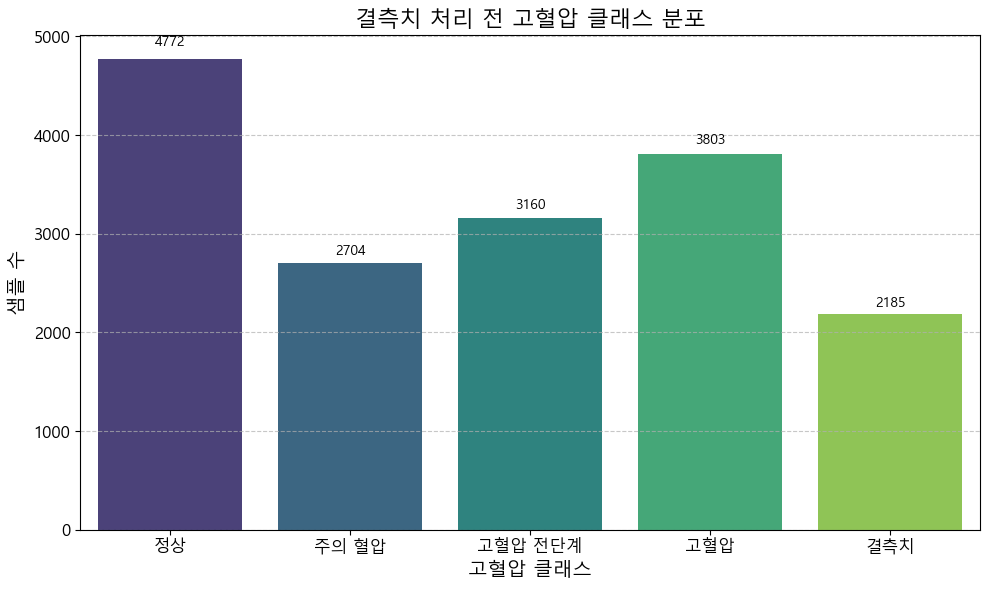


**결측치 처리 전 고혈압 클래스 분포 (수치):**
HE_HP
정상         4772
고혈압        3803
고혈압 전단계    3160
주의 혈압      2704
결측치        2185
Name: count, dtype: int64


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm # 폰트 설정용

# 한글 폰트 설정 (Windows 예시, 다른 OS에서는 경로를 맞춰주세요)
# 'Malgun Gothic'이 없으면 시스템에 설치된 다른 한글 폰트명으로 변경해주세요 (예: 'AppleGothic', 'NanumGothic').
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지
    print("한글 폰트 'Malgun Gothic' 설정 완료.")
except:
    print("한글 폰트 'Malgun Gothic'을 찾을 수 없습니다. 기본 폰트로 출력됩니다.")
    print("설치된 폰트 확인: import matplotlib.font_manager as fm; [f.name for f in fm.fontManager.ttflist]")
    print("또는 다른 폰트명으로 변경해주세요 (예: 'AppleGothic', 'NanumGothic').")


# 고혈압 클래스 한글 라벨 매핑
label_map = {
    1: "정상",
    2: "주의 혈압",
    3: "고혈압 전단계",
    4: "고혈압"
}

# 'HE_HP' 컬럼의 복사본을 만들어 결측치 처리 전 상태를 시각화합니다.
# 이 복사본에 한글 라벨을 매핑하고, 결측치도 그대로 포함하여 시각화합니다.
plot_data_before_imputation = data['HE_HP'].copy()

# 결측치(NaN) 값을 시각화에 포함시키기 위해 '결측치' 라벨로 임시 매핑
# value_counts()는 기본적으로 NaN을 제외하므로, 명시적으로 포함하거나
# 범주형으로 변환하여 NaN을 하나의 범주로 취급하게 할 수 있습니다.
# 여기서는 plot_data_before_imputation에 직접 NaN을 '결측치'로 매핑하여 시각화에 나타나게 합니다.
plot_data_before_imputation = plot_data_before_imputation.map(label_map)
plot_data_before_imputation = plot_data_before_imputation.fillna("결측치")

# 시각화를 위한 데이터 준비: 각 클래스의 빈도수 계산
class_counts = plot_data_before_imputation.value_counts(dropna=False) # dropna=False로 NaN도 포함

# 바 차트의 순서를 정의합니다. (정상, 주의, 전단계, 고혈압, 결측치)
# 실제 데이터에 따라 이 순서 리스트를 조정할 수 있습니다.
order_list = ["정상", "주의 혈압", "고혈압 전단계", "고혈압", "결측치"]
# 실제 존재하는 클래스만 순서 리스트에 포함
order_list = [label for label in order_list if label in class_counts.index]


# 시각화: 카운트 플롯
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis", order=order_list)

plt.title("결측치 처리 전 고혈압 클래스 분포", fontsize=16)
plt.xlabel("고혈압 클래스", fontsize=14)
plt.ylabel("샘플 수", fontsize=14)
plt.xticks(rotation=0, fontsize=12) # x축 라벨 수평 유지
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 바 위에 샘플 수 표시
for index, value in enumerate(class_counts[order_list]): # 순서에 맞춰서 값 가져오기
    plt.text(index, value + (value * 0.02), str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

print("\n**결측치 처리 전 고혈압 클래스 분포 (수치):**")
print(class_counts)

In [112]:
import pandas as pd
import numpy as np


# --- HE_HP 결측치 처리 개선 (수정된 코드) ---

# 1. 9, 99, 999, 888 등을 NaN으로 처리
data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)


# # 조건 1-1: DI1_pt 8 (의사 진단 없음) & HE_HP NaN & 수축기,이완기 혈압 정상
condition_hp_normal = (
    data['DI1_pt'] == 8 # 이 부분을 'DE1_dg'로 사용하려면 data['DE1_dg'] == 0 으로 변경
) & (
    data['HE_HP'].isnull()
) & (
    data['HE_sbp1'] < 120
) & (
    data['HE_dbp1'] < 80
) 

# !!! 중요: 여기 변수명을 올바른 것으로 수정 !!!
data.loc[condition_hp_normal, 'HE_HP'] = 1 # 1: 혈압 정상
print(f"HE_HP 결측치 중 'DI1_pt=8 & 혈압/콜레스테롤/BMI/혈당 정상 조건 만족'하는 경우 1로 채움. ({condition_hp_normal.sum()}개)")


# 조건 1-2: DI1_pt 8 (의사 진단 없음) & HE_HP NaN & 수축기,이완기 혈압 '주의 혈압' 범위
condition_hp_pre_attention = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 120) & (data['HE_sbp1'] < 130) & (data['HE_dbp1'] < 80)
)
data.loc[condition_hp_pre_attention, 'HE_HP'] = 2 # 2: 주의 혈압
print(f"HE_HP 결측치 중 'DI1_pt=8 & 120<=수축기<130 & 이완기<80' 조건 만족하는 경우 2로 채움. ({condition_hp_pre_attention.sum()}개)")


# 조건 1-3: DI1_pt 8 (의사 진단 없음) & HE_HP NaN & 수축기,이완기 혈압 '고혈압 전단계' 범위
condition_hp_pre_hypertension = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 130) & (data['HE_sbp1'] < 140) & (data['HE_dbp1'] < 90)
)
data.loc[condition_hp_pre_hypertension, 'HE_HP'] = 3 # 3: 고혈압 전단계
print(f"HE_HP 결측치 중 'DI1_pt=8 & 130<=수축기<140 & 이완기<90' 조건 만족하는 경우 3로 채움. ({condition_hp_pre_hypertension.sum()}개)")


# 조건 1-4: DI1_pt 8 (의사 진단 없음) & HE_HP NaN & 수축기,이완기 혈압 '고혈압' 범위
condition_hp_hypertension = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 140) | (data['HE_dbp1'] >= 90)
)
# !!! 중요: 여기 변수명을 올바른 것으로 수정 !!!
data.loc[condition_hp_hypertension, 'HE_HP'] = 4 # 4: 고혈압
print(f"HE_HP 결측치 중 'DI1_pt=8 & (수축기>=140 또는 이완기>=90)' 조건 만족하는 경우 4로 채움. ({condition_hp_hypertension.sum()}개)")


# 3. 남은 결측치는 드랍하거나 다른 방식으로 처리
#    위에서 정의되지 않은 케이스 (예: DI1_pt가 8이 아니거나, 혈압/콜레스테롤 등 지표가 NaN인 경우 등)
if data['HE_HP'].isnull().any():
    initial_nan_count_after_fill = data['HE_HP'].isnull().sum()
    data = data[data['HE_HP'].notnull()].copy() # .copy()를 추가하여 SettingWithCopyWarning 방지
    print(f"남은 HE_HP 결측치 ({initial_nan_count_after_fill}개) 제거 완료.")
else:
    print("모든 HE_HP 결측치 처리가 완료되었습니다.")

print(f"\nHE_HP NaN count after all processing: {data['HE_HP'].isnull().sum()}")
print("\nHE_HP 최종 분포:")
print(data['HE_HP'].value_counts(dropna=False))

HE_HP 결측치 중 'DI1_pt=8 & 혈압/콜레스테롤/BMI/혈당 정상 조건 만족'하는 경우 1로 채움. (1216개)
HE_HP 결측치 중 'DI1_pt=8 & 120<=수축기<130 & 이완기<80' 조건 만족하는 경우 2로 채움. (149개)
HE_HP 결측치 중 'DI1_pt=8 & 130<=수축기<140 & 이완기<90' 조건 만족하는 경우 3로 채움. (46개)
HE_HP 결측치 중 'DI1_pt=8 & (수축기>=140 또는 이완기>=90)' 조건 만족하는 경우 4로 채움. (23개)
남은 HE_HP 결측치 (751개) 제거 완료.

HE_HP NaN count after all processing: 0

HE_HP 최종 분포:
HE_HP
1.0    5988
4.0    3826
3.0    3206
2.0    2853
Name: count, dtype: int64


한글 폰트 'Malgun Gothic' 설정 완료.


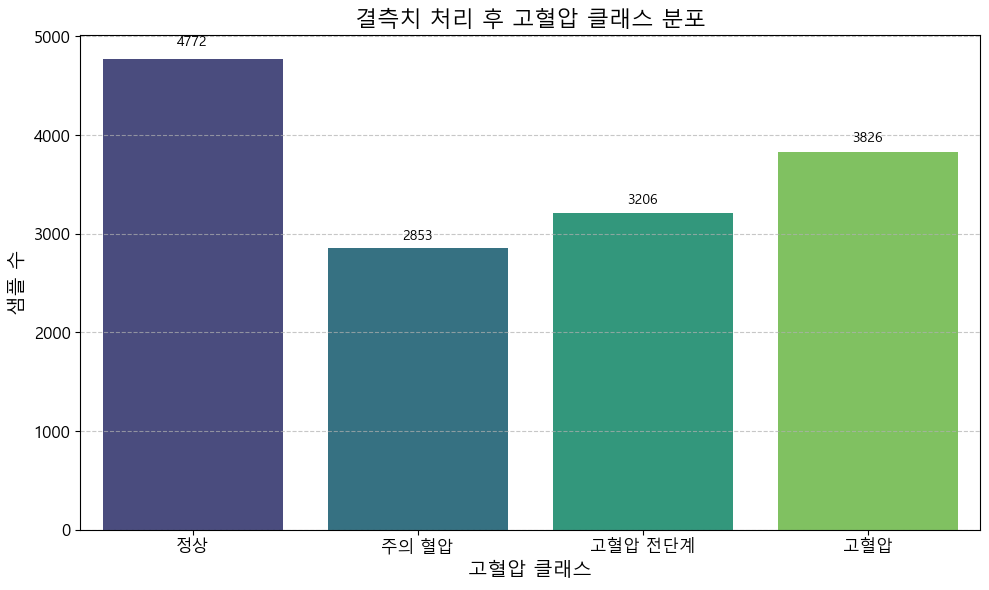


**결측치 처리 후 고혈압 클래스 분포 (수치):**
HE_HP
정상         4772
고혈압        3826
고혈압 전단계    3206
주의 혈압      2853
Name: count, dtype: int64


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm # 폰트 설정용

# 한글 폰트 설정 (Windows 예시, 다른 OS에서는 경로를 맞춰주세요)
# 'Malgun Gothic'이 없으면 시스템에 설치된 다른 한글 폰트명으로 변경해주세요 (예: 'AppleGothic', 'NanumGothic').
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지
    print("한글 폰트 'Malgun Gothic' 설정 완료.")
except:
    print("한글 폰트 'Malgun Gothic'을 찾을 수 없습니다. 기본 폰트로 출력됩니다.")
    print("설치된 폰트 확인: import matplotlib.font_manager as fm; [f.name for f in fm.fontManager.ttflist]")
    print("또는 다른 폰트명으로 변경해주세요 (예: 'AppleGothic', 'NanumGothic').")


# 고혈압 클래스 한글 라벨 매핑
label_map = {
    1: "정상",
    2: "주의 혈압",
    3: "고혈압 전단계",
    4: "고혈압"
}

# 'HE_HP' 컬럼의 복사본을 만들어 결측치 처리 전 상태를 시각화합니다.
# 이 복사본에 한글 라벨을 매핑하고, 결측치도 그대로 포함하여 시각화합니다.
plot_data_before_imputation = data['HE_HP'].copy()

# 결측치(NaN) 값을 시각화에 포함시키기 위해 '결측치' 라벨로 임시 매핑
# value_counts()는 기본적으로 NaN을 제외하므로, 명시적으로 포함하거나
# 범주형으로 변환하여 NaN을 하나의 범주로 취급하게 할 수 있습니다.
# 여기서는 plot_data_before_imputation에 직접 NaN을 '결측치'로 매핑하여 시각화에 나타나게 합니다.
plot_data_before_imputation = plot_data_before_imputation.map(label_map)
plot_data_before_imputation = plot_data_before_imputation.fillna("결측치")

# 시각화를 위한 데이터 준비: 각 클래스의 빈도수 계산
class_counts = plot_data_before_imputation.value_counts(dropna=False) # dropna=False로 NaN도 포함

# 바 차트의 순서를 정의합니다. (정상, 주의, 전단계, 고혈압, 결측치)
# 실제 데이터에 따라 이 순서 리스트를 조정할 수 있습니다.
order_list = ["정상", "주의 혈압", "고혈압 전단계", "고혈압", "결측치"]
# 실제 존재하는 클래스만 순서 리스트에 포함
order_list = [label for label in order_list if label in class_counts.index]


# 시각화: 카운트 플롯
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis", order=order_list)

plt.title("결측치 처리 후 고혈압 클래스 분포", fontsize=16)
plt.xlabel("고혈압 클래스", fontsize=14)
plt.ylabel("샘플 수", fontsize=14)
plt.xticks(rotation=0, fontsize=12) # x축 라벨 수평 유지
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 바 위에 샘플 수 표시
for index, value in enumerate(class_counts[order_list]): # 순서에 맞춰서 값 가져오기
    plt.text(index, value + (value * 0.02), str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

print("\n**결측치 처리 후 고혈압 클래스 분포 (수치):**")
print(class_counts)

한글 폰트 'Malgun Gothic' 설정 완료.
결측치 처리 전 데이터 복사 완료.
처리 전 HE_HP NaN 개수: 2185개
--------------------------------------------------
제공해주신 결측치 처리 코드 적용 시작...
HE_HP 결측치 중 'DI1_pt=8 & 120<=수축기<130 & 이완기<80' 조건 만족하는 경우 2로 채움. (149개)
HE_HP 결측치 중 'DI1_pt=8 & 130<=수축기<140 & 이완기<90' 조건 만족하는 경우 3로 채움. (46개)
HE_HP 결측치 중 'DI1_pt=8 & (수축기>=140 또는 이완기>=90)' 조건 만족하는 경우 4로 채움. (23개)
남은 HE_HP 결측치 (1967개) 제거 완료.

HE_HP NaN count after all processing: 0
HE_HP 최종 분포:
HE_HP
1.0    4772
4.0    3826
3.0    3206
2.0    2853
Name: count, dtype: int64
제공해주신 결측치 처리 코드 적용 완료.
--------------------------------------------------
결측치 처리 후 데이터 복사 완료.
처리 후 HE_HP NaN 개수: 0개
--------------------------------------------------


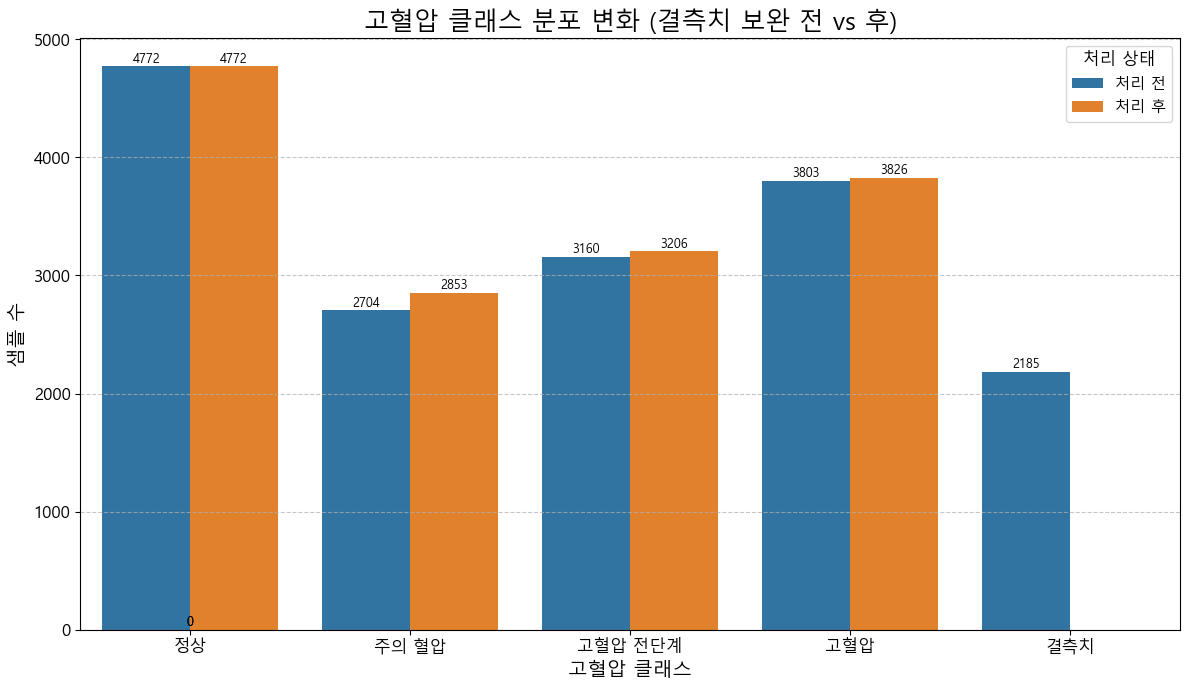


--- 각 클래스별 샘플 수 변화 요약 ---
결측치 보완 전:
 HE_HP
1.0    결측치
2.0    결측치
3.0    결측치
4.0    결측치
NaN    결측치
Name: count, dtype: object

결측치 보완 후:
 HE_HP
1.0    결측치
2.0    결측치
3.0    결측치
4.0    결측치
Name: count, dtype: object


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 사용자
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
    print("한글 폰트 'Malgun Gothic' 설정 완료.")
except:
    print("한글 폰트 'Malgun Gothic'을 찾을 수 없습니다. 기본 폰트로 출력됩니다.")
    print("설치된 폰트 확인: import matplotlib.font_manager as fm; [f.name for f in fm.fontManager.ttflist]")
    print("또는 다른 폰트명으로 변경해주세요 (예: 'AppleGothic', 'NanumGothic').")



# --- 1. 결측치 처리 '전' 데이터 분포 기록 ---
# 결측치 처리 전의 HE_HP 컬럼 복사본을 생성합니다.
# 이 시점의 data는 결측치 처리 코드가 적용되기 전의 상태여야 합니다.
data_before_imputation = data['HE_HP'].copy()
print("결측치 처리 전 데이터 복사 완료.")
print(f"처리 전 HE_HP NaN 개수: {data_before_imputation.isnull().sum()}개")
print("-" * 50)


# --- 2. 제공해주신 HE_HP 결측치 처리 코드 적용 ---
print("제공해주신 결측치 처리 코드 적용 시작...")

# 1. 9, 99, 999, 888 등을 NaN으로 처리
data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)


# 조건 1-1: DE1_pt 8 (의사 진단 없음) & HE_DM_HbA1c가 NaN & 공복혈당 정상 (70 < HE_glu < 100)
# 이 부분은 HE_DM_HbA1c 컬럼에 대한 처리이므로 HE_HP 시각화에는 직접적 영향 없음
# 하지만 코드 흐름상 유지
condition_glu_normal = (
    data['DE1_pt'] == 8
) & (
    data['HE_DM_HbA1c'].isnull()
) & (
   (data['HE_glu'] > 70) & (data['HE_glu'] < 100) # 괄호 추가하여 가독성 개선
)
# data.loc[condition_glu_normal, 'HE_DM_HbA1c'] = 1 # 1: 당뇨 정상
# print(f"HE_DM_HbA1c 결측치 중 'DE1_pt=8 & 공복혈당<100' 조건 만족하는 경우 1로 채움. ({condition_glu_normal.sum()}개)")
# 위에 주석처리되어 있었으므로 다시 주석 처리합니다.

# 조건 1-2: DI1_pt 8 (의사 진단 없음) & HE_HP NaN & 수축기,이완기 혈압 '주의 혈압' 범위
condition_hp_pre_attention = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 120) & (data['HE_sbp1'] < 130) & (data['HE_dbp1'] < 80)
)
data.loc[condition_hp_pre_attention, 'HE_HP'] = 2 # 2: 주의 혈압
print(f"HE_HP 결측치 중 'DI1_pt=8 & 120<=수축기<130 & 이완기<80' 조건 만족하는 경우 2로 채움. ({condition_hp_pre_attention.sum()}개)")


# 조건 1-3: DI1_pt 8 (의사 진단 없음) & HE_HP NaN & 수축기,이완기 혈압 '고혈압 전단계' 범위
condition_hp_pre_hypertension = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 130) & (data['HE_sbp1'] < 140) & (data['HE_dbp1'] < 90)
)
data.loc[condition_hp_pre_hypertension, 'HE_HP'] = 3 # 3: 고혈압 전단계
print(f"HE_HP 결측치 중 'DI1_pt=8 & 130<=수축기<140 & 이완기<90' 조건 만족하는 경우 3로 채움. ({condition_hp_pre_hypertension.sum()}개)")


# 조건 1-4: DI1_pt 8 (의사 진단 없음) & HE_HP NaN & 수축기,이완기 혈압 '고혈압' 범위
condition_hp_hypertension = (
    data['DI1_pt'] == 8
) & (
    data['HE_HP'].isnull()
) & (
    (data['HE_sbp1'] >= 140) | (data['HE_dbp1'] >= 90)
)
data.loc[condition_hp_hypertension, 'HE_HP'] = 4 # 4: 고혈압
print(f"HE_HP 결측치 중 'DI1_pt=8 & (수축기>=140 또는 이완기>=90)' 조건 만족하는 경우 4로 채움. ({condition_hp_hypertension.sum()}개)")


# 3. 남은 결측치는 드랍하거나 다른 방식으로 처리
if data['HE_HP'].isnull().any():
    initial_nan_count_after_fill = data['HE_HP'].isnull().sum()
    data = data[data['HE_HP'].notnull()].copy() # .copy()를 추가하여 SettingWithCopyWarning 방지
    print(f"남은 HE_HP 결측치 ({initial_nan_count_after_fill}개) 제거 완료.")
else:
    print("모든 HE_HP 결측치 처리가 완료되었습니다.")

print(f"\nHE_HP NaN count after all processing: {data['HE_HP'].isnull().sum()}")
print("HE_HP 최종 분포:")
print(data['HE_HP'].value_counts(dropna=False))
print("제공해주신 결측치 처리 코드 적용 완료.")
print("-" * 50)

# --- 3. 결측치 처리 '후' 데이터 분포 기록 ---
# 결측치 처리 후의 HE_HP 컬럼 상태는 이미 'data'에 반영되어 있습니다.
data_after_imputation = data['HE_HP'].copy()
print("결측치 처리 후 데이터 복사 완료.")
print(f"처리 후 HE_HP NaN 개수: {data_after_imputation.isnull().sum()}개")
print("-" * 50)


# --- 4. 시각화를 위한 데이터 통합 및 준비 ---
# 고혈압 클래스 한글 라벨 매핑
label_map = {
    1: "정상",
    2: "주의 혈압",
    3: "고혈압 전단계",
    4: "고혈압"
}

# 결측치 처리 전후의 각 클래스별 빈도 계산
counts_before = data_before_imputation.value_counts(dropna=False).sort_index()
counts_after = data_after_imputation.value_counts(dropna=False).sort_index()

# DataFrame으로 변환 및 컬럼명 변경
df_before = counts_before.to_frame(name='샘플 수').reset_index()
# `reset_index()` 후 생성되는 컬럼 이름은 `HE_HP`입니다.
df_before['HE_HP_label'] = df_before['HE_HP'].map(label_map).fillna("결측치")
df_before['처리 상태'] = '처리 전'

df_after = counts_after.to_frame(name='샘플 수').reset_index()
# `reset_index()` 후 생성되는 컬럼 이름은 `HE_HP`입니다.
df_after['HE_HP_label'] = df_after['HE_HP'].map(label_map).fillna("결측치")
df_after['처리 상태'] = '처리 후'

# 두 DataFrame 병합
merged_plot_data = pd.concat([df_before, df_after])

# 바 차트의 순서를 정의합니다. (정상, 주의 혈압, 고혈압 전단계, 고혈압, 결측치)
# 실제 데이터에 존재하는 클래스만 순서 리스트에 포함
order_list = ["정상", "주의 혈압", "고혈압 전단계", "고혈압", "결측치"]
actual_classes_in_data = merged_plot_data['HE_HP_label'].unique()
ordered_actual_classes = [label for label in order_list if label in actual_classes_in_data]


# --- 5. 시각화 (그룹화된 바 차트) ---
plt.figure(figsize=(12, 7))

# 여기에서 palette를 대비되는 색상으로 변경합니다.
# 'mako'는 진한 파랑-보라 계열, 'rocket'은 진한 빨강-주황 계열입니다.
# 'viridis'와 같은 단일 톤 팔레트 대신 대비가 강한 팔레트를 사용하거나 직접 색상을 지정할 수 있습니다.
# 예시: palette=['#1f77b4', '#ff7f0e'] (파란색과 주황색)
sns.barplot(x='HE_HP_label', y='샘플 수', hue='처리 상태', data=merged_plot_data,
            palette=['#1f77b4', '#ff7f0e'], # 대비가 강한 파란색과 주황색으로 변경
            order=ordered_actual_classes)

plt.title("고혈압 클래스 분포 변화 (결측치 보완 전 vs 후)", fontsize=18)
plt.xlabel("고혈압 클래스", fontsize=14)
plt.ylabel("샘플 수", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="처리 상태", fontsize=11, title_fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 바 위에 샘플 수 표시
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

print("\n--- 각 클래스별 샘플 수 변화 요약 ---")
print("결측치 보완 전:\n", data_before_imputation.value_counts(dropna=False).map(label_map).fillna("결측치").sort_index())
print("\n결측치 보완 후:\n", data_after_imputation.value_counts(dropna=False).map(label_map).fillna("결측치").sort_index())

한글 폰트 'Malgun Gothic' 설정 완료.
결측치 처리 전 데이터 복사 완료.
처리 전 HE_DM_HbA1c NaN 개수: 4682개
--------------------------------------------------
제공해주신 결측치 처리 코드 적용 시작...
HE_DM_HbA1c 결측치 중 'DE1_pt=8 & 공복혈당<100' 조건 만족하는 경우 1로 채움. (4391개)
HE_DM_HbA1c 결측치 중 'DE1_pt=8 & 100<=공복혈당<=125' 조건 만족하는 경우 2로 채움. (0개)
HE_DM_HbA1c 결측치 중 'DE1_pt=8 & 공복혈당>=126' 조건 만족하는 경우 3으로 채움. (0개)
남은 HE_DM_HbA1c 결측치 (291개) 제거 완료.
\HE_DM_HbA1c NaN count after all processing: 0
HE_DM_HbA1c 최종 분포:
HE_DM_HbA1c
1.0    10456
2.0     4046
3.0     1831
Name: count, dtype: int64
제공해주신 결측치 처리 코드 적용 완료.
--------------------------------------------------
결측치 처리 후 데이터 복사 완료.
처리 후 HE_DM_HbA1c NaN 개수: 0개
--------------------------------------------------


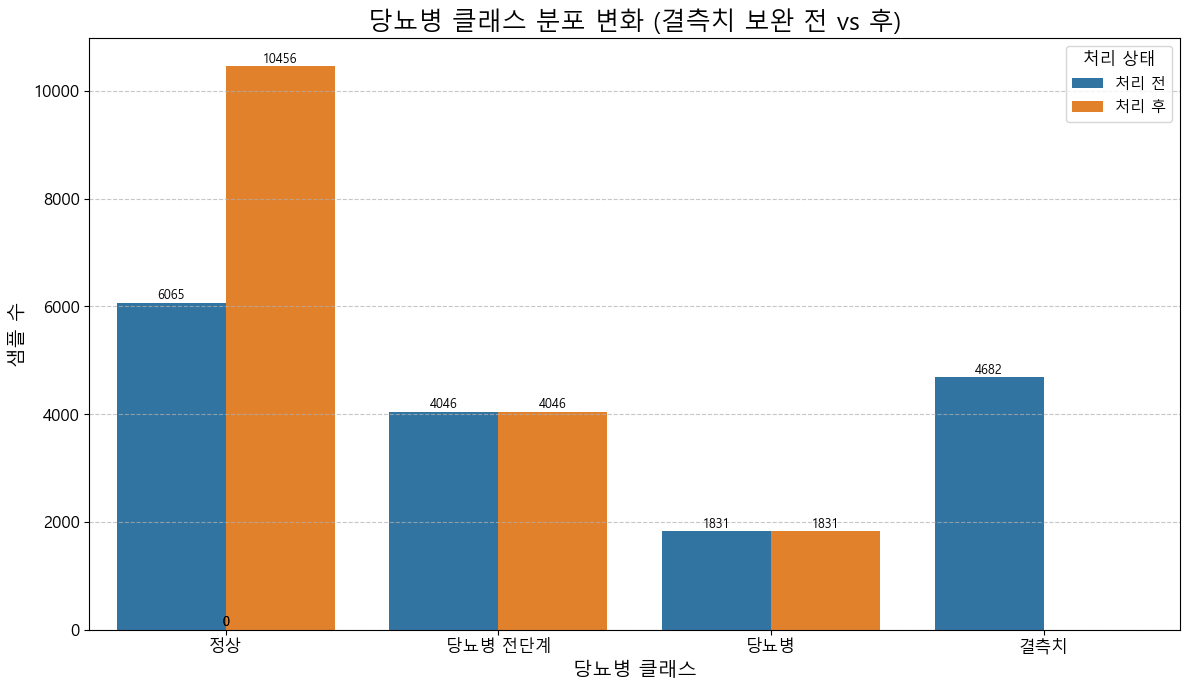


--- 각 클래스별 샘플 수 변화 요약 ---
결측치 보완 전:
 HE_DM_HbA1c
1.0    결측치
2.0    결측치
3.0    결측치
NaN    결측치
Name: count, dtype: object

결측치 보완 후:
 HE_DM_HbA1c
1.0    결측치
2.0    결측치
3.0    결측치
Name: count, dtype: object


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 사용자
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
    print("한글 폰트 'Malgun Gothic' 설정 완료.")
except:
    print("한글 폰트 'Malgun Gothic'을 찾을 수 없습니다. 기본 폰트로 출력됩니다.")
    print("설치된 폰트 확인: import matplotlib.font_manager as fm; [f.name for f in fm.fontManager.ttflist]")
    print("또는 다른 폰트명으로 변경해주세요 (예: 'AppleGothic', 'NanumGothic').")



# --- 1. 결측치 처리 '전' 데이터 분포 기록 ---
# 결측치 처리 전의 HE_HP 컬럼 복사본을 생성합니다.
# 이 시점의 data는 결측치 처리 코드가 적용되기 전의 상태여야 합니다.
data_before_imputation = data['HE_DM_HbA1c'].copy()
print("결측치 처리 전 데이터 복사 완료.")
print(f"처리 전 HE_DM_HbA1c NaN 개수: {data_before_imputation.isnull().sum()}개")
print("-" * 50)


# --- 2. 제공해주신 HE_HP 결측치 처리 코드 적용 ---
print("제공해주신 결측치 처리 코드 적용 시작...")

# 1. 9, 99, 999, 888 등을 NaN으로 처리
data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)

# 조건 1-1: DE1_pt 8 (의사 진단 없음) & HE_DM_HbA1c가 NaN & 공복혈당 정상 (70 < HE_glu < 100)
condition_glu_normal = (
    data['DE1_pt'] == 8
) & (
    data['HE_DM_HbA1c'].isnull()
) & (
   (data['HE_glu'] > 70) & data['HE_glu'] < 100
)
data.loc[condition_glu_normal, 'HE_DM_HbA1c'] = 1 # 1: 당뇨 정상
print(f"HE_DM_HbA1c 결측치 중 'DE1_pt=8 & 공복혈당<100' 조건 만족하는 경우 1로 채움. ({condition_glu_normal.sum()}개)")


# 조건 1-2: DE1_pt 8 (의사 진단 없음) & HE_DM_HbA1c가 NaN & 공복혈당장애 (100 <= HE_glu <= 125)
condition_glu_pre_diabetes = (
    data['DE1_pt'] == 8
) & (
    data['HE_DM_HbA1c'].isnull()
) & (
    (data['HE_glu'] >= 100) & (data['HE_glu'] <= 125)
)
data.loc[condition_glu_pre_diabetes, 'HE_DM_HbA1c'] = 2 #당뇨병 전단계
print(f"HE_DM_HbA1c 결측치 중 'DE1_pt=8 & 100<=공복혈당<=125' 조건 만족하는 경우 2로 채움. ({condition_glu_pre_diabetes.sum()}개)")

# 조건 1-3: DE1_pt 0 (의사 진단 없음) & HE_DM_HbA1c가 NaN & 공복혈당 당뇨 >= 126
# 이는 의사 진단은 없지만 공복혈당으로 볼 때 당뇨병으로 의심되는 경우입니다.
condition_glu_diabetes_suspect = (
    data['DE1_pt'] == 8
) & (
    data['HE_DM_HbA1c'].isnull()
) & (
    data['HE_glu'] >= 126
)
data.loc[condition_glu_diabetes_suspect, 'HE_DM_HbA1c'] = 3 # 3: 당뇨병
print(f"HE_DM_HbA1c 결측치 중 'DE1_pt=8 & 공복혈당>=126' 조건 만족하는 경우 3으로 채움. ({condition_glu_diabetes_suspect.sum()}개)")


# 3. 남은 결측치는 드랍하거나 다른 방식으로 처리 (기존과 동일)
#    위에서 정의되지 않은 케이스 (예: HE_glu가 NaN이거나 범위를 벗어나는 경우, 또는 다른 이유로 남은 NaN)
#    이후 모델 학습에 영향을 주지 않도록 처리합니다.
if data['HE_DM_HbA1c'].isnull().any():
    initial_nan_count_after_fill = data['HE_DM_HbA1c'].isnull().sum()
    data = data[data['HE_DM_HbA1c'].notnull()] # 결측치 제거
    print(f"남은 HE_DM_HbA1c 결측치 ({initial_nan_count_after_fill}개) 제거 완료.")
else:
    print("모든 HE_DM_HbA1c 결측치 처리가 완료되었습니다.")

print(f"\HE_DM_HbA1c NaN count after all processing: {data['HE_DM_HbA1c'].isnull().sum()}")
print("HE_DM_HbA1c 최종 분포:")
print(data['HE_DM_HbA1c'].value_counts(dropna=False))
print("제공해주신 결측치 처리 코드 적용 완료.")
print("-" * 50)

# --- 3. 결측치 처리 '후' 데이터 분포 기록 ---
# 결측치 처리 후의 HE_DM_HbA1c 컬럼 상태는 이미 'data'에 반영되어 있습니다.
data_after_imputation = data['HE_DM_HbA1c'].copy()
print("결측치 처리 후 데이터 복사 완료.")
print(f"처리 후 HE_DM_HbA1c NaN 개수: {data_after_imputation.isnull().sum()}개")
print("-" * 50)


# --- 4. 시각화를 위한 데이터 통합 및 준비 ---
# 고혈압 클래스 한글 라벨 매핑
label_map = {
    1: "정상",
    2: "당뇨병 전단계",
    3: "당뇨병"
}

# 결측치 처리 전후의 각 클래스별 빈도 계산
counts_before = data_before_imputation.value_counts(dropna=False).sort_index()
counts_after = data_after_imputation.value_counts(dropna=False).sort_index()

# DataFrame으로 변환 및 컬럼명 변경
df_before = counts_before.to_frame(name='샘플 수').reset_index()
# `reset_index()` 후 생성되는 컬럼 이름은 `HE_DM_HbA1c`입니다.
df_before['HE_DM_HbA1c_label'] = df_before['HE_DM_HbA1c'].map(label_map).fillna("결측치")
df_before['처리 상태'] = '처리 전'

df_after = counts_after.to_frame(name='샘플 수').reset_index()
# `reset_index()` 후 생성되는 컬럼 이름은 `HE_DM_HbA1c`입니다.
df_after['HE_DM_HbA1c_label'] = df_after['HE_DM_HbA1c'].map(label_map).fillna("결측치")
df_after['처리 상태'] = '처리 후'

# 두 DataFrame 병합
merged_plot_data = pd.concat([df_before, df_after])

# 바 차트의 순서를 정의합니다. (정상, 주의 혈압, 고혈압 전단계, 고혈압, 결측치)
# 실제 데이터에 존재하는 클래스만 순서 리스트에 포함
order_list = ["정상", "당뇨병 전단계", "당뇨병", "결측치"]
actual_classes_in_data = merged_plot_data['HE_DM_HbA1c_label'].unique()
ordered_actual_classes = [label for label in order_list if label in actual_classes_in_data]


# --- 5. 시각화 (그룹화된 바 차트) ---
plt.figure(figsize=(12, 7))

# 여기에서 palette를 대비되는 색상으로 변경합니다.
# 'mako'는 진한 파랑-보라 계열, 'rocket'은 진한 빨강-주황 계열입니다.
# 'viridis'와 같은 단일 톤 팔레트 대신 대비가 강한 팔레트를 사용하거나 직접 색상을 지정할 수 있습니다.
# 예시: palette=['#1f77b4', '#ff7f0e'] (파란색과 주황색)
sns.barplot(x='HE_DM_HbA1c_label', y='샘플 수', hue='처리 상태', data=merged_plot_data,
            palette=['#1f77b4', '#ff7f0e'], # 대비가 강한 파란색과 주황색으로 변경
            order=ordered_actual_classes)

plt.title("당뇨병 클래스 분포 변화 (결측치 보완 전 vs 후)", fontsize=18)
plt.xlabel("당뇨병 클래스", fontsize=14)
plt.ylabel("샘플 수", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="처리 상태", fontsize=11, title_fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 바 위에 샘플 수 표시
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

print("\n--- 각 클래스별 샘플 수 변화 요약 ---")
print("결측치 보완 전:\n", data_before_imputation.value_counts(dropna=False).map(label_map).fillna("결측치").sort_index())
print("\n결측치 보완 후:\n", data_after_imputation.value_counts(dropna=False).map(label_map).fillna("결측치").sort_index())

**전처리 후 EDA**

In [3]:
data = pd.read_csv("최종_건강검진_데이터셋(가공된).csv")

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 예시: 맑은 고딕으로 설정 (Windows 환경 시)
plt.rcParams['axes.unicode_minus'] = False

**피처셀렉:전진선택법 (고혈압) **

In [9]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# 데이터 준비
num_features = [
    'age', 'sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]
X = data[num_features]
y = data['HE_HP'].astype(int)- 1

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# 사용할 모델들
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# 결과 저장
feature_selection_results = {}

# 전진 선택 반복
for name, model in models.items():
    print(f"\n🔍 {name} 전진 선택 중...")
    sfs = SequentialFeatureSelector(
        model,
        n_features_to_select='auto',  # 자동으로 성능 향상 멈출 때까지
        direction='forward',
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )
    sfs.fit(X_scaled, y)
    selected = [feature for feature, sel in zip(num_features, sfs.get_support()) if sel]
    feature_selection_results[name] = selected
    print(f"✅ {name} 선택된 피처: {selected}")



🔍 RandomForest 전진 선택 중...
✅ RandomForest 선택된 피처: ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_Upro', 'HE_HbA1c', 'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct']

🔍 XGBoost 전진 선택 중...
✅ XGBoost 선택된 피처: ['age', 'sex', 'HE_ht', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_HbA1c', 'HE_chol', 'HE_LDL_drct']

🔍 LightGBM 전진 선택 중...
✅ LightGBM 선택된 피처: ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_Upro', 'HE_HbA1c', 'HE_chol', 'HE_TG', 'HE_LDL_drct']

🔍 HistGB 전진 선택 중...
✅ HistGB 선택된 피처: ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_HbA1c', 'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct', 'HE_ast']

🔍 DecisionTree 전진 선택 중...
✅ DecisionTree 선택된 피처: ['age', 'sex', 'HE_wt', 'HE_sbp1', 'HE_dbp1', 'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_LDL_drct']

🔍 LogisticRegression 전진 선택 중...
✅ LogisticRegression 선택된 피처: ['age', 'HE_wc', 'HE_sbp1', 'HE_dbp1', 'HE_HbA1c', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_ast', 'HE_alt']


**피처 셀렉 : 후진선택 ( 고혈압 )**

In [10]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# 수치형 변수 정의
num_features = [
    'age', 'sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]
X = data[num_features]
y = data['HE_HP'].astype(int)- 1

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 모델들 정의
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# 결과 저장용 딕셔너리
backward_selection_results = {}

# 후진 선택 반복
for name, model in models.items():
    print(f"\n🔍 {name} 후진 선택 중...")
    sfs = SequentialFeatureSelector(
        model,
        n_features_to_select='auto',  # 자동으로 성능 향상 멈출 때까지
        direction='backward',         # 🔁 후진선택
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )
    sfs.fit(X_scaled, y)
    selected = [feature for feature, sel in zip(num_features, sfs.get_support()) if sel]
    backward_selection_results[name] = selected
    print(f"✅ {name} 선택된 피처: {selected}")



🔍 RandomForest 후진 선택 중...
✅ RandomForest 선택된 피처: ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_Upro', 'HE_HbA1c', 'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct']

🔍 XGBoost 후진 선택 중...
✅ XGBoost 선택된 피처: ['age', 'sex', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_HbA1c', 'HE_chol', 'HE_TG', 'HE_LDL_drct']

🔍 LightGBM 후진 선택 중...
✅ LightGBM 선택된 피처: ['age', 'HE_ht', 'HE_wt', 'HE_sbp1', 'HE_dbp1', 'HE_HbA1c', 'HE_chol', 'HE_TG', 'HE_LDL_drct']

🔍 HistGB 후진 선택 중...
✅ HistGB 선택된 피처: ['age', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_TG', 'HE_LDL_drct', 'HE_crea']

🔍 DecisionTree 후진 선택 중...
✅ DecisionTree 선택된 피처: ['age', 'HE_wt', 'HE_wc', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_HbA1c', 'HE_HDL_st2', 'HE_LDL_drct']

🔍 LogisticRegression 후진 선택 중...
✅ LogisticRegression 선택된 피처: ['age', 'HE_wt', 'HE_wc', 'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_HDL_st2', 'HE_LDL_drct']


**전진선택 (당뇨병)**

In [12]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# 데이터 준비
num_features = [
    'age', 'sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]
X = data[num_features]
y = data['HE_DM_HbA1c'].astype(int)- 1

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# 사용할 모델들
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# 결과 저장
feature_selection_results = {}

# 전진 선택 반복
for name, model in models.items():
    print(f"\n🔍 {name} 전진 선택 중...")
    sfs = SequentialFeatureSelector(
        model,
        n_features_to_select='auto',  # 자동으로 성능 향상 멈출 때까지
        direction='forward',
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )
    sfs.fit(X_scaled, y)
    selected = [feature for feature, sel in zip(num_features, sfs.get_support()) if sel]
    feature_selection_results[name] = selected
    print(f"✅ {name} 선택된 피처: {selected}")



🔍 RandomForest 전진 선택 중...
✅ RandomForest 선택된 피처: ['age', 'HE_wt', 'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea']

🔍 XGBoost 전진 선택 중...
✅ XGBoost 선택된 피처: ['age', 'HE_wc', 'HE_BMI', 'HE_sbp1', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct']

🔍 LightGBM 전진 선택 중...
✅ LightGBM 선택된 피처: ['age', 'sex', 'HE_wt', 'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_LDL_drct', 'HE_ast']

🔍 HistGB 전진 선택 중...
✅ HistGB 선택된 피처: ['age', 'sex', 'HE_wc', 'HE_dbp1', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_LDL_drct', 'HE_crea']

🔍 DecisionTree 전진 선택 중...
✅ DecisionTree 선택된 피처: ['age', 'sex', 'HE_wc', 'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_TG', 'HE_LDL_drct']

🔍 LogisticRegression 전진 선택 중...
✅ LogisticRegression 선택된 피처: ['sex', 'HE_wt', 'HE_BMI', 'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_LDL_drct', 'HE_alt']


**후진선택(당뇨)**

**전진선택(비만**)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# 데이터 준비
num_features = [
    'age', 'sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]
X = data[num_features]
y = data['HE_obe'].astype(int)- 1

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# 사용할 모델들
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# 결과 저장
feature_selection_results = {}

# 전진 선택 반복
for name, model in models.items():
    print(f"\n🔍 {name} 전진 선택 중...")
    sfs = SequentialFeatureSelector(
        model,
        n_features_to_select='auto',  # 자동으로 성능 향상 멈출 때까지
        direction='forward',
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )
    sfs.fit(X_scaled, y)
    selected = [feature for feature, sel in zip(num_features, sfs.get_support()) if sel]
    feature_selection_results[name] = selected
    print(f"✅ {name} 선택된 피처: {selected}")


**후진선택 (비만)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# 수치형 변수 정의
num_features = [
    'age', 'sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt'
]
X = data[num_features]
y = data['HE_obe'].astype(int)- 1

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 모델들 정의
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# 결과 저장용 딕셔너리
backward_selection_results = {}

# 후진 선택 반복
for name, model in models.items():
    print(f"\n🔍 {name} 후진 선택 중...")
    sfs = SequentialFeatureSelector(
        model,
        n_features_to_select='auto',  # 자동으로 성능 향상 멈출 때까지
        direction='backward',         # 🔁 후진선택
        scoring='accuracy',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )
    sfs.fit(X_scaled, y)
    selected = [feature for feature, sel in zip(num_features, sfs.get_support()) if sel]
    backward_selection_results[name] = selected
    print(f"✅ {name} 선택된 피처: {selected}")


**모델비교 (클래스 불균형 전 vs 후)**

In [26]:
#클래스 불균형 처리 전
data = pd.read_csv("건강조사_2012~2023.csv")
import pandas as pd

# 남기고 싶은 컬럼 리스트
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg'
]
# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # 남은 결측치는 드랍랍
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMI가 KNN 대체된 경우 표시
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # 남은 결측치는 드랍랍
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # 남은 결측치는 드랍랍
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#결측치 비율 낮은 변수 처리
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # 연속형 변수

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#생체 지표 결측치 처리
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI', 'HE_HbA1c'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# 스케일링
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# 역스케일링
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data

# knn_scaler_filename = 'HE_DM_HbA1c_knn_scaler.pkl'
# knn_imputer_filename = 'HE_DM_HbA1c_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_obe_knn_scaler.pkl'
# knn_imputer_filename = 'HE_obe_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_HP_knn_scaler.pkl'
# knn_imputer_filename = 'HE_HP_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)

print("결측치 처리 후 데이터 상태:")
print(data.isnull().sum())
print("\n타겟 변수 클래스 비율:")
for target in ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']:
    if target in data.columns:
        print(f"\n{target}:\n{data[target].value_counts(normalize=True)}")
print("\n기본 통계량:")
print(data.describe())

# 전처리 코드 끝에 추가
#data.to_csv('건강조사_2022~2023_통합(가공된).csv', index=False, encoding='utf-8-sig')

# 원래 데이터프레임이 df일 때
data = data[columns_to_keep]


DE1_dg missing ratio: 0.05237948763017972
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 62.2
Median for HE_ht: 162.6
Median for HE_BMI: 23.675727844161234
결측치 처리 후 데이터 상태:
mod_d                 0
ID                16116
ID_fam                0
year                  0
region                0
                  ...  
T_SOds            61545
E_CLC_T           60682
wt_bia            59277
wt_biant          59523
HE_BMI_imputed        0
Length: 1478, dtype: int64

타겟 변수 클래스 비율:

HE_DM_HbA1c:
HE_DM_HbA1c
1.0    0.705403
2.0    0.164937
3.0    0.129660
Name: proportion, dtype: float64

HE_obe:
HE_obe
2.0    0.459001
3.0    0.263287
4.0    0.190054
1.0    0.040482
5.0    0.032627
6.0    0.014550
Name: proportion, dtype: float64

HE_HP:
HE_HP
1.0    0.434794
3.0    0.292810
2.0    0.210890
4.0    0.061506
Name: proportion, dtype: float64

기본 통계량:
               year        region        town_t         apt_t         


===== 📌 D_tree 모델 훈련 및 평가 =====
▶ D_tree 교차 검증 F1 점수 (각 Fold): ['63.76%', '63.16%', '62.65%', '63.60%', '63.59%']
▶ D_tree 평균 교차 검증 F1 점수: 63.35%
▶ D_tree 테스트 F1 점수: 63.85%
▶ D_tree 테스트 정확도: 61.99%

--- D_tree 분류 보고서 ---
              precision    recall  f1-score   support

          정상       0.85      0.83      0.84      5547
        주의혈압       0.48      0.57      0.52      2690
     고혈압 전단계       0.74      0.40      0.52      3735
         고혈압       0.13      0.36      0.20       785

    accuracy                           0.62     12757
   macro avg       0.55      0.54      0.52     12757
weighted avg       0.69      0.62      0.64     12757


--- D_tree 혼동 행렬 ---


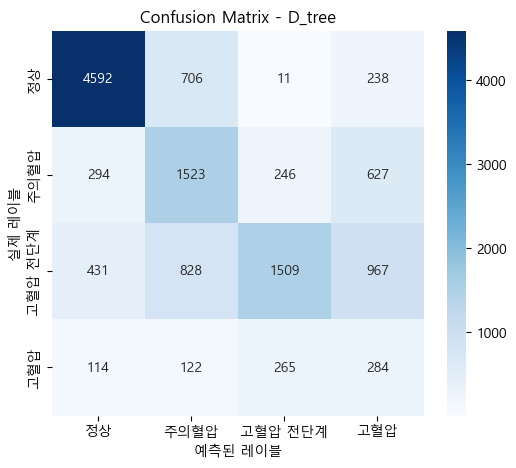


===== 📌 RF 모델 훈련 및 평가 =====
▶ RF 교차 검증 F1 점수 (각 Fold): ['66.48%', '67.00%', '66.52%', '66.64%', '66.58%']
▶ RF 평균 교차 검증 F1 점수: 66.64%
▶ RF 테스트 F1 점수: 67.39%
▶ RF 테스트 정확도: 66.14%

--- RF 분류 보고서 ---
              precision    recall  f1-score   support

          정상       0.89      0.81      0.85      5547
        주의혈압       0.51      0.69      0.59      2690
     고혈압 전단계       0.71      0.46      0.56      3735
         고혈압       0.23      0.49      0.32       785

    accuracy                           0.66     12757
   macro avg       0.59      0.61      0.58     12757
weighted avg       0.72      0.66      0.67     12757


--- RF 혼동 행렬 ---


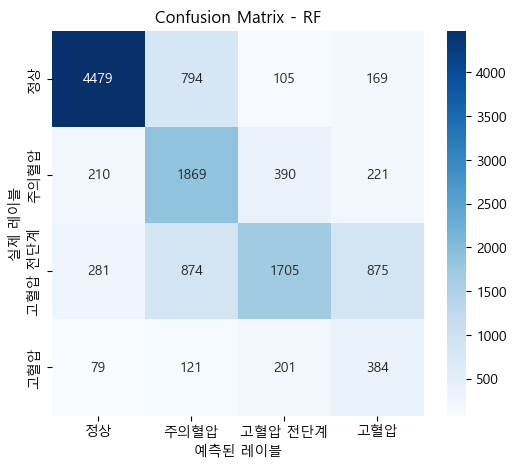


===== 📌 HistGB 모델 훈련 및 평가 =====
▶ HistGB 교차 검증 F1 점수 (각 Fold): ['70.96%', '71.73%', '70.87%', '71.79%', '71.68%']
▶ HistGB 평균 교차 검증 F1 점수: 71.41%
▶ HistGB 테스트 F1 점수: 71.76%
▶ HistGB 테스트 정확도: 72.85%

--- HistGB 분류 보고서 ---
              precision    recall  f1-score   support

          정상       0.84      0.89      0.86      5547
        주의혈압       0.59      0.56      0.58      2690
     고혈압 전단계       0.67      0.72      0.69      3735
         고혈압       0.55      0.19      0.28       785

    accuracy                           0.73     12757
   macro avg       0.66      0.59      0.60     12757
weighted avg       0.72      0.73      0.72     12757


--- HistGB 혼동 행렬 ---


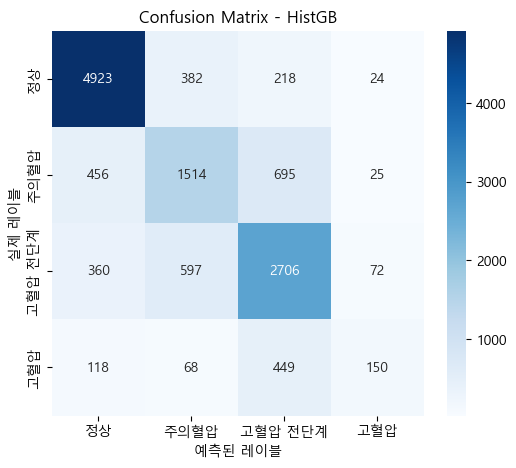


===== 📌 XGB 모델 훈련 및 평가 =====
▶ XGB 교차 검증 F1 점수 (각 Fold): ['70.86%', '71.60%', '71.21%', '71.54%', '71.58%']
▶ XGB 평균 교차 검증 F1 점수: 71.36%
▶ XGB 테스트 F1 점수: 71.96%
▶ XGB 테스트 정확도: 72.95%

--- XGB 분류 보고서 ---
              precision    recall  f1-score   support

          정상       0.84      0.89      0.86      5547
        주의혈압       0.59      0.56      0.58      2690
     고혈압 전단계       0.67      0.72      0.69      3735
         고혈압       0.59      0.22      0.32       785

    accuracy                           0.73     12757
   macro avg       0.67      0.60      0.61     12757
weighted avg       0.72      0.73      0.72     12757


--- XGB 혼동 행렬 ---


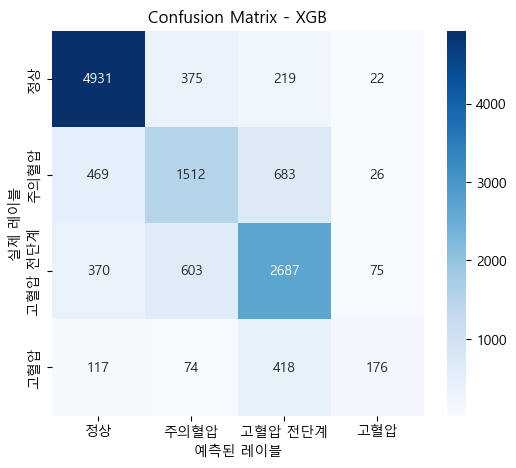


===== 📌 LGBM 모델 훈련 및 평가 =====
▶ LGBM 교차 검증 F1 점수 (각 Fold): ['70.78%', '71.25%', '71.68%', '70.43%', '71.36%']
▶ LGBM 평균 교차 검증 F1 점수: 71.10%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4067
[LightGBM] [Info] Number of data points in the train set: 51025, number of used features: 17
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
▶ LGBM 테스트 F1 점수: 71.31%
▶ LGBM 테스트 정확도: 70.32%

--- LGBM 분류 보고서 ---
              precision    recall  f1-score   support

          정상       0.89      0.82      0.85      5547
        주의혈압       0.55      0.69      0.61      2690
     고혈압 전단계       0.73      0.56      0.64      3735
         고혈압       0.33      0.59      0.42       785

    accuracy 

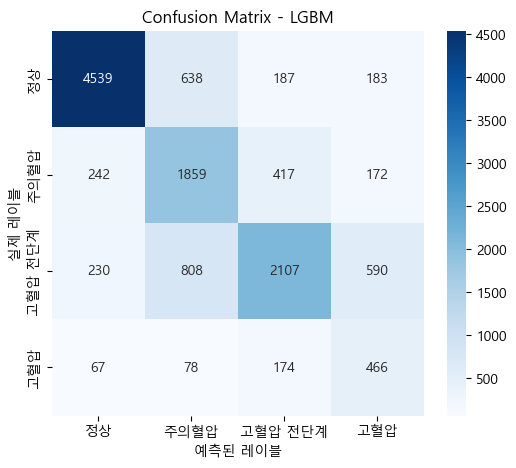


===== 📌 LogReg 모델 훈련 및 평가 =====
▶ LogReg 교차 검증 F1 점수 (각 Fold): ['64.53%', '64.64%', '64.55%', '64.37%', '64.02%']
▶ LogReg 평균 교차 검증 F1 점수: 64.42%
▶ LogReg 테스트 F1 점수: 64.22%
▶ LogReg 테스트 정확도: 62.59%

--- LogReg 분류 보고서 ---
              precision    recall  f1-score   support

          정상       0.87      0.81      0.84      5547
        주의혈압       0.48      0.55      0.51      2690
     고혈압 전단계       0.68      0.41      0.51      3735
         고혈압       0.21      0.59      0.31       785

    accuracy                           0.63     12757
   macro avg       0.56      0.59      0.54     12757
weighted avg       0.69      0.63      0.64     12757


--- LogReg 혼동 행렬 ---


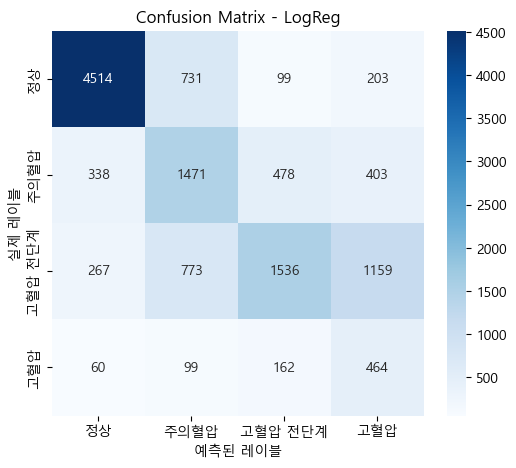

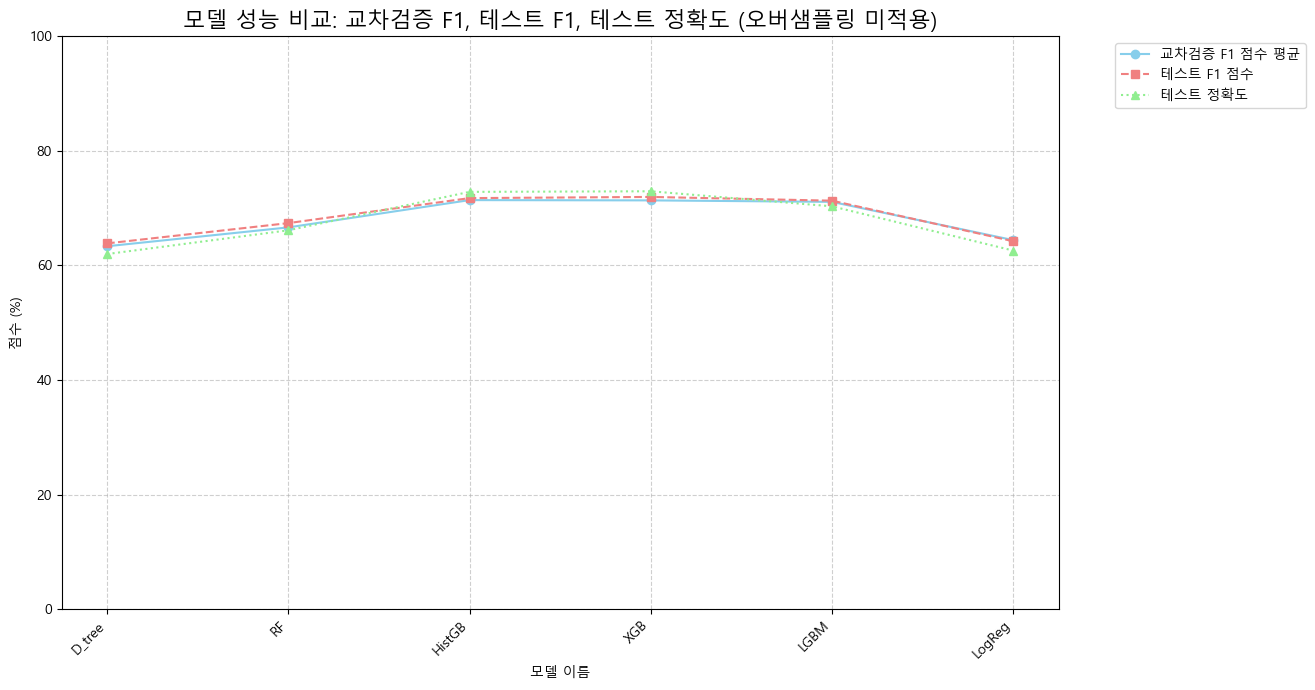

In [27]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns # 혼동 행렬 시각화를 위해 추가


# 입력 피처 및 타겟 설정
features= ['HE_alt','HE_ast','HE_Upro','HE_crea','HE_TG','HE_HDL_st2','HE_wt','HE_ht','age','HE_sbp1', 'HE_dbp1',
            'HE_wc', 'HE_glu', 'HE_BMI', 'HE_chol', 'HE_LDL_drct', 'HE_HbA1c']
X = data[features]
y = data['HE_HP'].astype(int) - 1

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 분류기 정의
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]

# 결과 저장용 리스트
modelaccuracies = [] # cross_val_score의 모든 fold 정확도
modelmeans = []      # cross_val_score의 평균 F1 score (CV)
modelnames = []      # 모델 이름
modeltest_f1 = []    # 테스트 F1 score
modeltest_acc = []   # 테스트 정확도

# 클래스 이름 정의 (y의 값이 0, 1, 2 이므로)
class_labels = ['정상', '주의혈압', '고혈압 전단계', '고혈압']

# 모델 훈련 및 평가
for classifier_name, classifier in classifiers:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # 교차 검증은 스케일링된 훈련 데이터(SMOTE 미적용)로 수행
    accuracies = cross_val_score(classifier, X_train_scaled, y_train, cv=skf, scoring='f1_weighted', n_jobs=-1)

    print(f"\n===== 📌 {classifier_name} 모델 훈련 및 평가 =====")
    print(f"▶ {classifier_name} 교차 검증 F1 점수 (각 Fold): {[f'{score*100:.2f}%' for score in accuracies]}")
    print(f"▶ {classifier_name} 평균 교차 검증 F1 점수: {accuracies.mean()*100:.2f}%")

    modelaccuracies.append(accuracies) # 각 Fold의 정확도 리스트
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100) # 평균 F1 점수 저장 (백분율)

    # 최종 모델 훈련은 SMOTE 미적용된 스케일링된 훈련 데이터로 진행
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled) # 테스트 데이터는 스케일링된 데이터를 사용

    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100) # 백분율로 저장
    modeltest_acc.append(test_acc*100) # 백분율로 저장

    print(f"▶ {classifier_name} 테스트 F1 점수: {test_f1*100:.2f}%")
    print(f"▶ {classifier_name} 테스트 정확도: {test_acc*100:.2f}%")

    # 분류 보고서 출력
    print(f"\n--- {classifier_name} 분류 보고서 ---")
    print(classification_report(y_test, y_pred, target_names=class_labels))

    # 혼동 행렬 시각화
    print(f"\n--- {classifier_name} 혼동 행렬 ---")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('예측된 레이블')
    plt.ylabel('실제 레이블')
    plt.show()



plt.figure(figsize=(14, 7))
plt.plot(modelnames, modelmeans, marker='o', linestyle='-', color='skyblue', label='교차검증 F1 점수 평균')
plt.plot(modelnames, modeltest_f1, marker='s', linestyle='--', color='lightcoral', label='테스트 F1 점수')
plt.plot(modelnames, modeltest_acc, marker='^', linestyle=':', color='lightgreen', label='테스트 정확도')

plt.ylim([0, 100]) # 점수 범위를 0-100으로 설정
plt.ylabel('점수 (%)')
plt.title('모델 성능 비교: 교차검증 F1, 테스트 F1, 테스트 정확도 (오버샘플링 미적용)', fontsize=16)
plt.xlabel('모델 이름')
plt.xticks(rotation=45, ha='right') # 모델 이름 회전 및 정렬
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # 범례를 그래프 밖에
plt.tight_layout(rect=[0, 0, 0.95, 1]) # 범례 공간 확보
plt.show()

In [28]:
data = pd.read_csv("최종_건강검진_데이터셋(가공된).csv")


===== 📌 D_tree 모델 훈련 및 평가 =====
▶ D_tree 교차 검증 F1 점수 (각 Fold): ['66.05%', '66.96%', '66.24%', '66.82%', '67.64%']
▶ D_tree 평균 교차 검증 F1 점수: 66.74%
▶ D_tree 테스트 F1 점수: 68.44%
▶ D_tree 테스트 정확도: 67.99%

--- D_tree 분류 보고서 ---
              precision    recall  f1-score   support

          정상       0.90      0.76      0.82      1163
        주의혈압       0.66      0.74      0.70       635
     고혈압 전단계       0.62      0.68      0.65       931
         고혈압       0.50      0.51      0.50       723

    accuracy                           0.68      3452
   macro avg       0.67      0.67      0.67      3452
weighted avg       0.69      0.68      0.68      3452


--- D_tree 혼동 행렬 ---


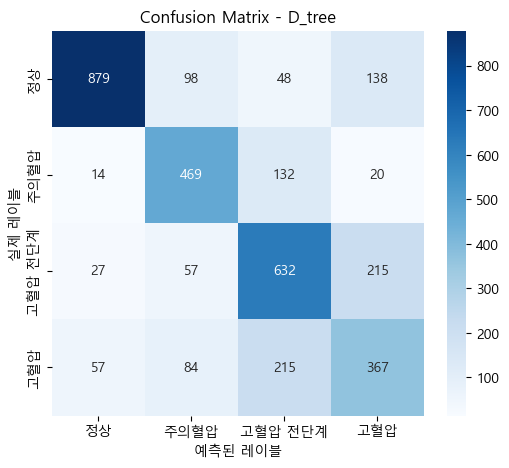


===== 📌 RF 모델 훈련 및 평가 =====
▶ RF 교차 검증 F1 점수 (각 Fold): ['68.45%', '70.04%', '69.27%', '69.09%', '70.32%']
▶ RF 평균 교차 검증 F1 점수: 69.44%
▶ RF 테스트 F1 점수: 70.33%
▶ RF 테스트 정확도: 70.57%

--- RF 분류 보고서 ---
              precision    recall  f1-score   support

          정상       0.85      0.86      0.86      1163
        주의혈압       0.58      0.78      0.66       635
     고혈압 전단계       0.67      0.62      0.64       931
         고혈압       0.65      0.51      0.57       723

    accuracy                           0.71      3452
   macro avg       0.69      0.69      0.68      3452
weighted avg       0.71      0.71      0.70      3452


--- RF 혼동 행렬 ---


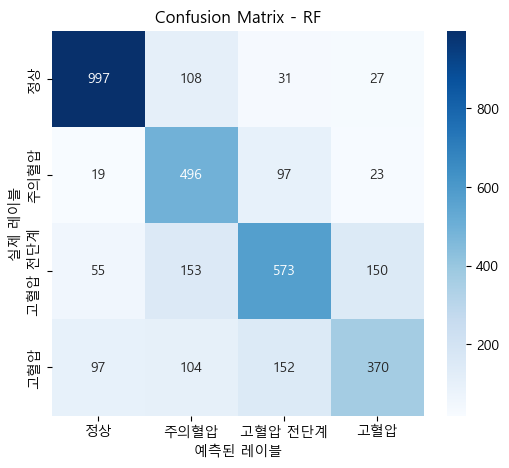


===== 📌 HistGB 모델 훈련 및 평가 =====
▶ HistGB 교차 검증 F1 점수 (각 Fold): ['72.29%', '72.92%', '72.94%', '72.09%', '74.30%']
▶ HistGB 평균 교차 검증 F1 점수: 72.91%
▶ HistGB 테스트 F1 점수: 74.84%
▶ HistGB 테스트 정확도: 74.97%

--- HistGB 분류 보고서 ---
              precision    recall  f1-score   support

          정상       0.86      0.86      0.86      1163
        주의혈압       0.71      0.71      0.71       635
     고혈압 전단계       0.69      0.76      0.72       931
         고혈압       0.68      0.59      0.63       723

    accuracy                           0.75      3452
   macro avg       0.74      0.73      0.73      3452
weighted avg       0.75      0.75      0.75      3452


--- HistGB 혼동 행렬 ---


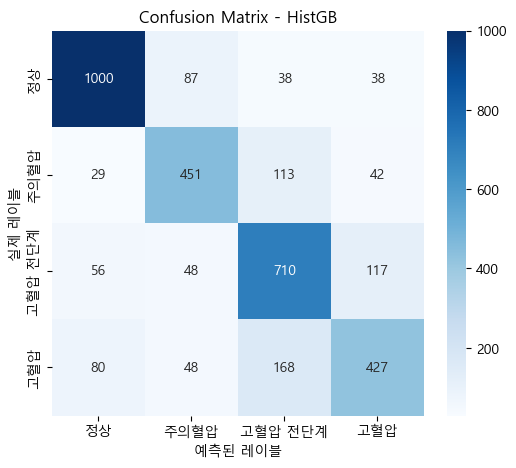


===== 📌 XGB 모델 훈련 및 평가 =====
▶ XGB 교차 검증 F1 점수 (각 Fold): ['72.07%', '71.75%', '73.08%', '71.58%', '72.55%']
▶ XGB 평균 교차 검증 F1 점수: 72.21%
▶ XGB 테스트 F1 점수: 74.56%
▶ XGB 테스트 정확도: 74.71%

--- XGB 분류 보고서 ---
              precision    recall  f1-score   support

          정상       0.85      0.86      0.86      1163
        주의혈압       0.71      0.70      0.70       635
     고혈압 전단계       0.70      0.75      0.72       931
         고혈압       0.67      0.60      0.64       723

    accuracy                           0.75      3452
   macro avg       0.73      0.73      0.73      3452
weighted avg       0.75      0.75      0.75      3452


--- XGB 혼동 행렬 ---


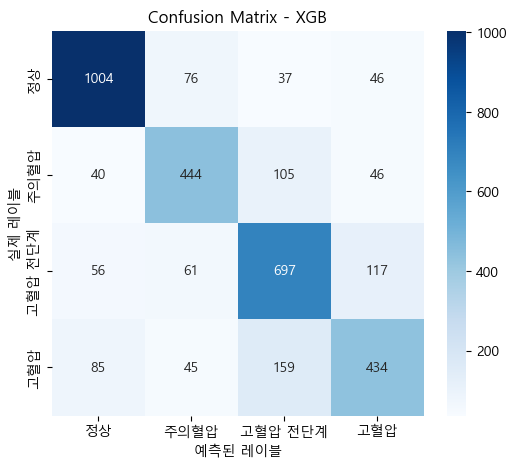


===== 📌 LGBM 모델 훈련 및 평가 =====
▶ LGBM 교차 검증 F1 점수 (각 Fold): ['72.40%', '72.07%', '72.79%', '72.08%', '73.68%']
▶ LGBM 평균 교차 검증 F1 점수: 72.60%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2990
[LightGBM] [Info] Number of data points in the train set: 13807, number of used features: 17
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
▶ LGBM 테스트 F1 점수: 74.30%
▶ LGBM 테스트 정확도: 74.22%

--- LGBM 분류 보고서 ---
              precision    recall  f1-score   support

          정상       0.87      0.83      0.85      1163
        주의혈압       0.67      0.74      0.71       635
     고혈압 전단계       0.71      0.71      0.71       931
         고혈압       0.65      0.63      0.64       723

    accuracy 

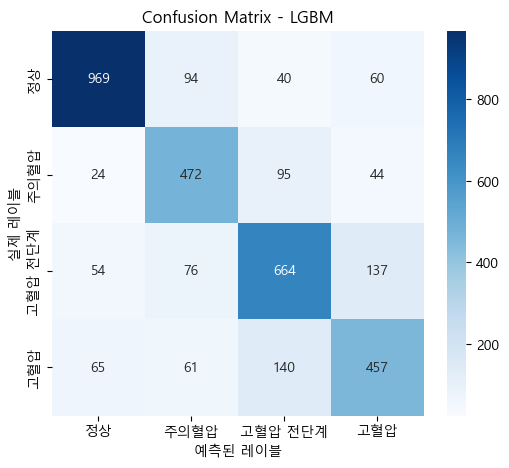


===== 📌 LogReg 모델 훈련 및 평가 =====
▶ LogReg 교차 검증 F1 점수 (각 Fold): ['62.98%', '63.57%', '61.32%', '61.98%', '61.93%']
▶ LogReg 평균 교차 검증 F1 점수: 62.36%
▶ LogReg 테스트 F1 점수: 63.26%
▶ LogReg 테스트 정확도: 63.27%

--- LogReg 분류 보고서 ---
              precision    recall  f1-score   support

          정상       0.85      0.82      0.83      1163
        주의혈압       0.51      0.63      0.56       635
     고혈압 전단계       0.60      0.43      0.50       931
         고혈압       0.49      0.61      0.54       723

    accuracy                           0.63      3452
   macro avg       0.61      0.62      0.61      3452
weighted avg       0.65      0.63      0.63      3452


--- LogReg 혼동 행렬 ---


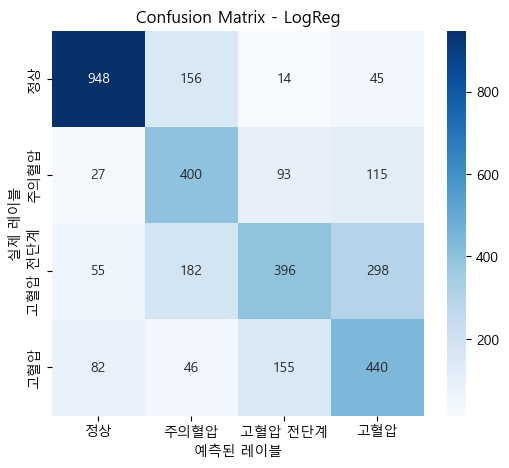

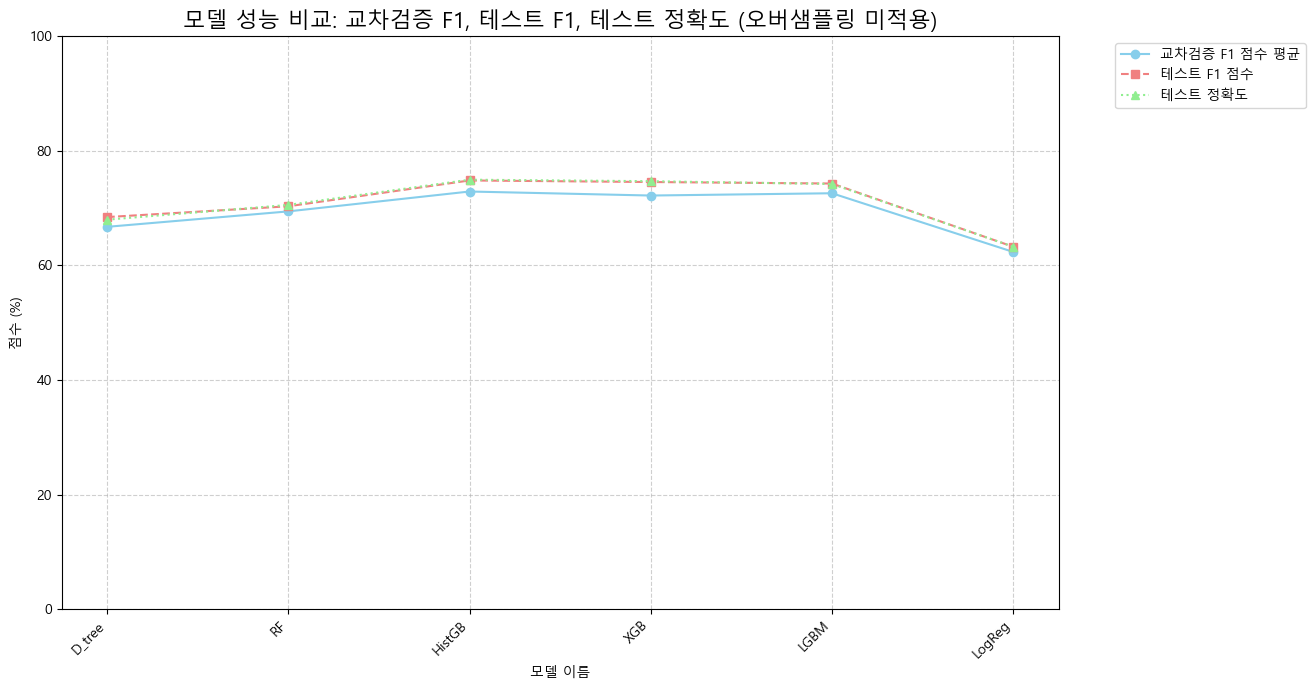

In [30]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns # 혼동 행렬 시각화를 위해 추가


# 입력 피처 및 타겟 설정
features= ['HE_alt','HE_ast','HE_Upro','HE_crea','HE_TG','HE_HDL_st2','HE_wt','HE_ht','age','HE_sbp1', 'HE_dbp1',
            'HE_wc', 'HE_glu', 'HE_BMI', 'HE_chol', 'HE_LDL_drct', 'HE_HbA1c']
X = data[features]
y = data['HE_HP'].astype(int) - 1

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 분류기 정의
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
]

classifier_names = [name for name, _ in classifiers]

# 결과 저장용 리스트
modelaccuracies = [] # cross_val_score의 모든 fold 정확도
modelmeans = []      # cross_val_score의 평균 F1 score (CV)
modelnames = []      # 모델 이름
modeltest_f1 = []    # 테스트 F1 score
modeltest_acc = []   # 테스트 정확도

# 클래스 이름 정의 (y의 값이 0, 1, 2 이므로)
class_labels = ['정상', '주의혈압', '고혈압 전단계', '고혈압']

# 모델 훈련 및 평가
for classifier_name, classifier in classifiers:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # 교차 검증은 스케일링된 훈련 데이터(SMOTE 미적용)로 수행
    accuracies = cross_val_score(classifier, X_train_scaled, y_train, cv=skf, scoring='f1_weighted', n_jobs=-1)

    print(f"\n===== 📌 {classifier_name} 모델 훈련 및 평가 =====")
    print(f"▶ {classifier_name} 교차 검증 F1 점수 (각 Fold): {[f'{score*100:.2f}%' for score in accuracies]}")
    print(f"▶ {classifier_name} 평균 교차 검증 F1 점수: {accuracies.mean()*100:.2f}%")

    modelaccuracies.append(accuracies) # 각 Fold의 정확도 리스트
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100) # 평균 F1 점수 저장 (백분율)

    # 최종 모델 훈련은 SMOTE 미적용된 스케일링된 훈련 데이터로 진행
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled) # 테스트 데이터는 스케일링된 데이터를 사용

    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100) # 백분율로 저장
    modeltest_acc.append(test_acc*100) # 백분율로 저장

    print(f"▶ {classifier_name} 테스트 F1 점수: {test_f1*100:.2f}%")
    print(f"▶ {classifier_name} 테스트 정확도: {test_acc*100:.2f}%")

    # 분류 보고서 출력
    print(f"\n--- {classifier_name} 분류 보고서 ---")
    print(classification_report(y_test, y_pred, target_names=class_labels))

    # 혼동 행렬 시각화
    print(f"\n--- {classifier_name} 혼동 행렬 ---")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('예측된 레이블')
    plt.ylabel('실제 레이블')
    plt.show()



plt.figure(figsize=(14, 7))
plt.plot(modelnames, modelmeans, marker='o', linestyle='-', color='skyblue', label='교차검증 F1 점수 평균')
plt.plot(modelnames, modeltest_f1, marker='s', linestyle='--', color='lightcoral', label='테스트 F1 점수')
plt.plot(modelnames, modeltest_acc, marker='^', linestyle=':', color='lightgreen', label='테스트 정확도')

plt.ylim([0, 100]) # 점수 범위를 0-100으로 설정
plt.ylabel('점수 (%)')
plt.title('모델 성능 비교: 교차검증 F1, 테스트 F1, 테스트 정확도 (오버샘플링 미적용)', fontsize=16)
plt.xlabel('모델 이름')
plt.xticks(rotation=45, ha='right') # 모델 이름 회전 및 정렬
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # 범례를 그래프 밖에
plt.tight_layout(rect=[0, 0, 0.95, 1]) # 범례 공간 확보
plt.show()

**모델 선정 및 평가**

--- HistGradientBoostingClassifier with balanced sample_weight Performance ---
              precision    recall  f1-score   support

          정상       0.88      0.85      0.86      1159
       주의 혈압       0.68      0.72      0.70       635
     고혈압 전단계       0.70      0.71      0.70       929
         고혈압       0.64      0.62      0.63       721

    accuracy                           0.74      3444
   macro avg       0.72      0.72      0.72      3444
weighted avg       0.74      0.74      0.74      3444



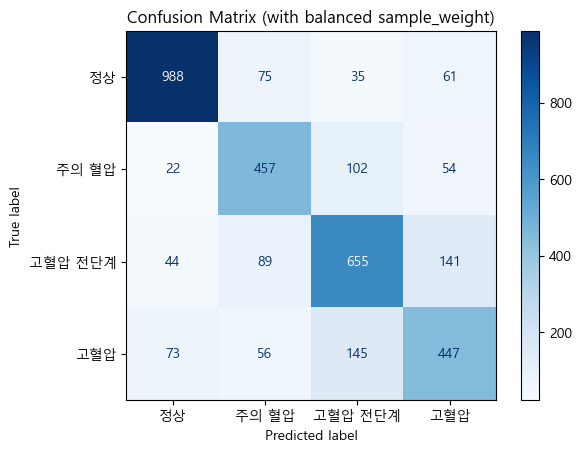


Overall Metrics:
Accuracy: 0.7395
Macro F1-score: 0.7227
Weighted F1-score: 0.7401


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_sample_weight # sample_weight 계산을 위한 임포트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (필요시 주석 해제 및 경로 수정)
# plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 사용자
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지
# font_path = 'C:/Windows/Fonts/malgun.ttf' # 실제 폰트 경로로 변경
# font_name = fm.FontProperties(fname=font_path, size=12).get_name()
# plt.rc('font', family=font_name)


# 입력 피처 및 타겟 설정
HE_HP_input_features = ['age','HE_sbp1', 'HE_dbp1', 'HE_TG','HE_BMI',  'HE_LDL_drct', 'HE_HbA1c']

# X와 y 정의 (0:정상, 1:경계형, 2:당뇨)
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1
class_names_korean = ['정상', '주의 혈압', '고혈압 전단계', '고혈압']

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- SMOTE 없이 모델 훈련 및 평가 (원본 불균형 데이터에 sample_weight 적용) ---
# 클래스 가중치 계산 (불균형 해소를 위해)
# 'balanced' 옵션은 각 클래스의 빈도에 반비례하여 가중치를 자동으로 계산합니다.
sample_weights_train = compute_sample_weight(class_weight='balanced', y=y_train)

# HistGradientBoostingClassifier 모델 생성 및 훈련
model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
model.fit(X_train_scaled, y_train, sample_weight=sample_weights_train) # sample_weight 적용!

# 예측 및 성능 평가
y_pred = model.predict(X_test_scaled)
report = classification_report(y_test, y_pred, target_names=class_names_korean, output_dict=True)

print("--- HistGradientBoostingClassifier with balanced sample_weight Performance ---")
print(classification_report(y_test, y_pred, target_names=class_names_korean))

# 혼동 행렬 시각화 (선택 사항)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_korean)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (with balanced sample_weight)')
plt.show()

# 전체 모델의 정확도(Accuracy), Macro F1, Weighted F1 출력 (선택 사항)
print("\nOverall Metrics:")
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Macro F1-score: {report['macro avg']['f1-score']:.4f}")
print(f"Weighted F1-score: {report['weighted avg']['f1-score']:.4f}")

Font set to: Malgun Gothic
원본 데이터의 클래스 분포:
HE_HP
0    5796
1    3172
2    4646
3    3605
Name: count, dtype: int64


훈련 데이터 (Split 후) 클래스 분포:
HE_HP
0    4637
1    2537
2    3717
3    2884
Name: count, dtype: int64


--- 1. Class_Weight 'balanced' 적용 모델 훈련 및 평가 ---
              precision    recall  f1-score   support

          정상       0.88      0.85      0.86      1159
       주의 혈압       0.68      0.72      0.70       635
     고혈압 전단계       0.70      0.71      0.70       929
         고혈압       0.64      0.62      0.63       721

    accuracy                           0.74      3444
   macro avg       0.72      0.72      0.72      3444
weighted avg       0.74      0.74      0.74      3444


--- 2. Borderline-SMOTE (클래스 1, 2만 오버샘플링) 적용 후 모델 훈련 및 평가 ---
오버샘플링 전 훈련 데이터 클래스 분포: {0: 4637, 1: 2537, 2: 3717, 3: 2884}
오버샘플링 목표 전략: {1: np.int64(4637), 2: np.int64(4637)}
오버샘플링 후 훈련 데이터 클래스 분포:
HE_HP
0    4637
1    4637
2    4637
3    2884
Name: count, dtype: int64
              precision    rec

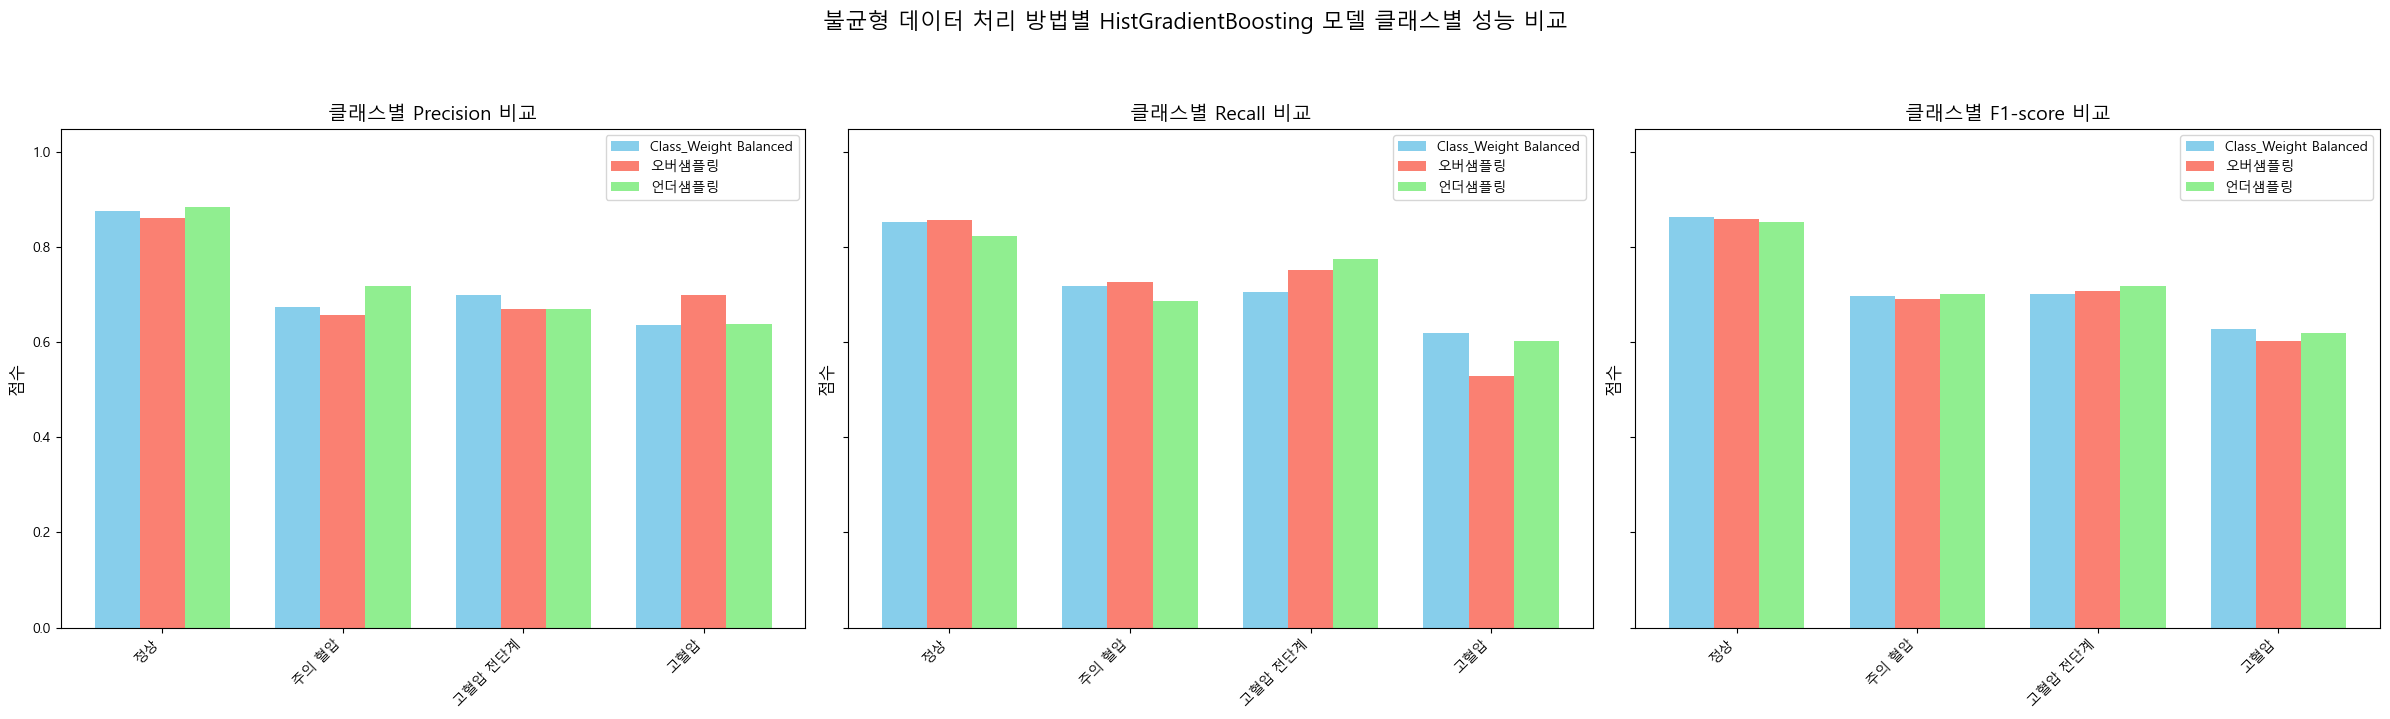

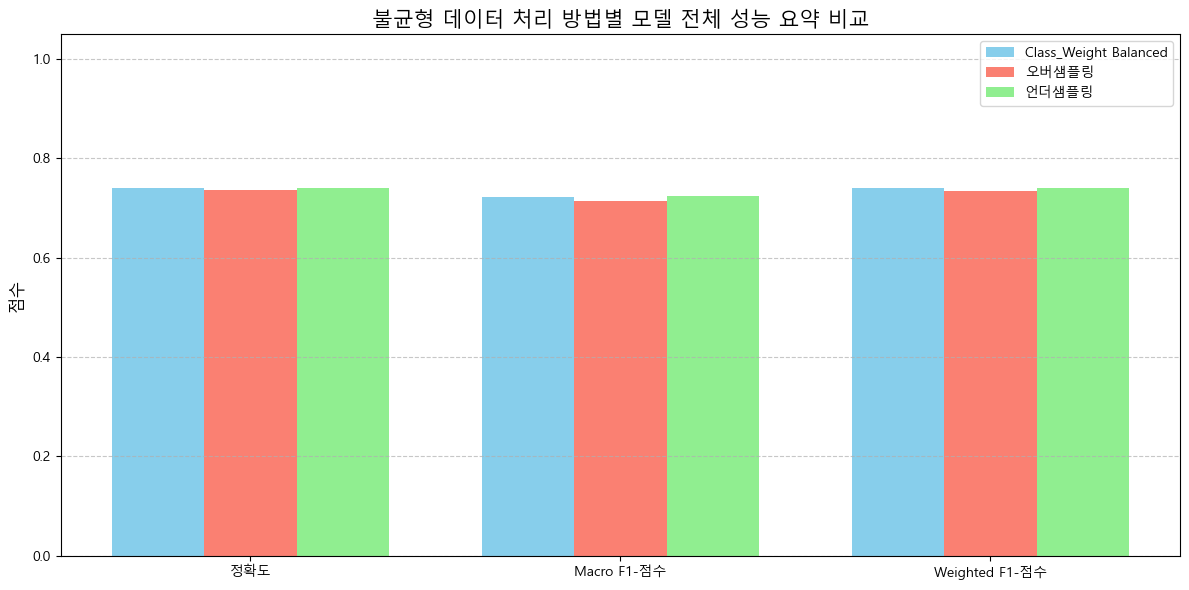

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 한글 폰트 설정 (필요시 주석 해제 및 경로 수정)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

font_path = 'C:/Windows/Fonts/malgun.ttf' # Windows 사용자
if os.path.exists(font_path):
    font_name = fm.FontProperties(fname=font_path, size=12).get_name()
    plt.rc('font', family=font_name)
    print(f"Font set to: {font_name}")
else:
    print(f"Warning: Font file not found at {font_path}. Using default font.")
    print("If Korean characters appear broken, please install a Korean font or specify the correct path.")





# 입력 피처 및 타겟 설정
HE_HP_input_features = ['age','HE_sbp1', 'HE_dbp1', 'HE_TG','HE_BMI',  'HE_LDL_drct', 'HE_HbA1c']

# X와 y 정의 (0:정상, 1:주의 혈압, 2:고혈압 전단계, 3:고혈압)
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1 # 0부터 시작하도록 조정
class_names_korean = ['정상', '주의 혈압', '고혈압 전단계', '고혈압']

print("원본 데이터의 클래스 분포:")
print(y.value_counts().sort_index())
print("\n")


# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 훈련 데이터의 실제 클래스 분포 확인
print("훈련 데이터 (Split 후) 클래스 분포:")
train_class_counts = y_train.value_counts().sort_index()
print(train_class_counts)
print("\n")

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 1. Class_Weight 'balanced' 적용 모델 훈련 및 평가 ---
print("--- 1. Class_Weight 'balanced' 적용 모델 훈련 및 평가 ---")
sample_weights_balanced = compute_sample_weight(class_weight='balanced', y=y_train)

model_balanced_weight = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
model_balanced_weight.fit(X_train_scaled, y_train, sample_weight=sample_weights_balanced)
y_pred_balanced_weight = model_balanced_weight.predict(X_test_scaled)
report_balanced_weight = classification_report(y_test, y_pred_balanced_weight, target_names=class_names_korean, output_dict=True)
print(classification_report(y_test, y_pred_balanced_weight, target_names=class_names_korean))


# --- 2. 특정 클래스만 오버샘플링 (Borderline-SMOTE) 적용 후 모델 훈련 및 평가 ---
print("\n--- 2. Borderline-SMOTE (클래스 1, 2만 오버샘플링) 적용 후 모델 훈련 및 평가 ---")

# 오버샘플링 전 훈련 데이터 클래스 분포
print("오버샘플링 전 훈련 데이터 클래스 분포:", train_class_counts.to_dict())

# 여기서는 '정상' (클래스 0)의 샘플 수를 기준으로 오버샘플링하여
# '주의 혈압'(클래스 1)과 '고혈압 전단계'(클래스 2)의 수를 늘립니다.
# 이는 Borderline-SMOTE의 요구사항 (목표 샘플 수가 현재 샘플 수보다 커야 함)을 만족시킵니다.
target_count_for_oversampling_smote = train_class_counts[0] # 가장 많은 '정상' 클래스 수

# 오버샘플링 전략 정의: {클래스 라벨: 목표 샘플 수}
# 오버샘플링할 클래스 (클래스 1, 2)만 딕셔너리에 포함
# 클래스 0(정상)과 클래스 3(고혈압)은 딕셔너리에 포함하지 않아 샘플 수가 변경되지 않습니다.
sampling_strategy_over = {
    1: target_count_for_oversampling_smote, # 주의 혈압을 '정상'과 동일하게 (또는 그 이상)
    2: target_count_for_oversampling_smote  # 고혈압 전단계를 '정상'과 동일하게 (또는 그 이상)
}

print(f"오버샘플링 목표 전략: {sampling_strategy_over}")

smote_custom = BorderlineSMOTE(random_state=42, kind='borderline-1', sampling_strategy=sampling_strategy_over)
X_train_smote_custom, y_train_smote_custom = smote_custom.fit_resample(X_train_scaled, y_train)

print("오버샘플링 후 훈련 데이터 클래스 분포:")
print(pd.Series(y_train_smote_custom).value_counts().sort_index())

model_after_smote_custom = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
model_after_smote_custom.fit(X_train_smote_custom, y_train_smote_custom)
y_pred_after_smote_custom = model_after_smote_custom.predict(X_test_scaled)
report_after_smote_custom = classification_report(y_test, y_pred_after_smote_custom, target_names=class_names_korean, output_dict=True)
print(classification_report(y_test, y_pred_after_smote_custom, target_names=class_names_korean))


# --- 3. 특정 클래스만 언더샘플링 (RandomUnderSampler) 적용 후 모델 훈련 및 평가 ---
print("\n--- 3. RandomUnderSampler (클래스 0만 언더샘플링) 적용 후 모델 훈련 및 평가 ---")

# 언더샘플링 전 훈련 데이터 클래스 분포
print("언더샘플링 전 훈련 데이터 클래스 분포:", train_class_counts.to_dict())

# '고혈압' (클래스 3)의 샘플 수를 기준으로 '정상' (클래스 0)을 언더샘플링
target_count_for_undersampling = train_class_counts[3]

# 언더샘플링 전략 정의: {클래스 라벨: 목표 샘플 수}
# 언더샘플링할 클래스 (클래스 0)만 딕셔너리에 포함하고, 목표 샘플 수를 지정.
# 나머지 클래스(1, 2, 3)는 RandomUnderSampler에 의해 샘플 수가 변경되지 않습니다.
sampling_strategy_under = {
    0: target_count_for_undersampling # 정상을 고혈압과 동일하게 (또는 그 이하)
}
print(f"언더샘플링 목표 전략: {sampling_strategy_under}")

rus_custom = RandomUnderSampler(random_state=42, sampling_strategy=sampling_strategy_under)
X_train_rus_custom, y_train_rus_custom = rus_custom.fit_resample(X_train_scaled, y_train)

print("언더샘플링 후 훈련 데이터 클래스 분포:")
print(pd.Series(y_train_rus_custom).value_counts().sort_index())

model_after_rus_custom = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
model_after_rus_custom.fit(X_train_rus_custom, y_train_rus_custom)
y_pred_after_rus_custom = model_after_rus_custom.predict(X_test_scaled)
report_after_rus_custom = classification_report(y_test, y_pred_after_rus_custom, target_names=class_names_korean, output_dict=True)
print(classification_report(y_test, y_pred_after_rus_custom, target_names=class_names_korean))


# --- 4. 세 가지 방법의 성능 지표 비교 시각화 (막대 그래프) ---

labels = ['Class_Weight Balanced', '오버샘플링', '언더샘플링']
reports = [report_balanced_weight, report_after_smote_custom, report_after_rus_custom]
colors = ['skyblue', 'salmon', 'lightgreen']

# 1. 각 클래스별 정밀도(Precision), 재현율(Recall), F1-점수(F1-Score) 비교
fig, axes = plt.subplots(1, 3, figsize=(24, 7), sharey=True)

metrics_to_plot = ['precision', 'recall', 'f1-score']

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    metric_values = []
    for r in reports:
        values_for_method = [r[c][metric] for c in class_names_korean]
        metric_values.append(values_for_method)

    x = np.arange(len(class_names_korean))
    width = 0.25

    for j, values in enumerate(metric_values):
        ax.bar(x + (j - 1) * width, values, width, label=labels[j], color=colors[j])

    ax.set_title(f'클래스별 {metric.capitalize()} 비교', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(class_names_korean, rotation=45, ha='right')
    ax.set_ylabel('점수', fontsize=12)
    ax.legend(fontsize=10)
    ax.set_ylim(0, 1.05)

plt.suptitle('불균형 데이터 처리 방법별 HistGradientBoosting 모델 클래스별 성능 비교', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. 전체 모델의 정확도(Accuracy), Macro F1, Weighted F1 비교
overall_metrics_labels = ['정확도', 'Macro F1-점수', 'Weighted F1-점수']

overall_metrics_data = []
for r in reports:
    overall_metrics_data.append([
        r['accuracy'],
        r['macro avg']['f1-score'],
        r['weighted avg']['f1-score']
    ])

x = np.arange(len(overall_metrics_labels))
width = 0.25

plt.figure(figsize=(12, 6))
for j, values in enumerate(overall_metrics_data):
    plt.bar(x + (j - 1) * width, values, width, label=labels[j], color=colors[j])

plt.ylabel('점수', fontsize=12)
plt.title('불균형 데이터 처리 방법별 모델 전체 성능 요약 비교', fontsize=15)
plt.xticks(x, overall_metrics_labels, rotation=0)
plt.ylim(0, 1.05)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**피처 중요도 평가(해석용/shap)**

In [28]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 4.2/150.0 MB 24.6 MB/s eta 0:00:06
   -- ------------------------------------- 9.7/150.0 MB 25.2 MB/s eta 0:00:06
   --- ------------------------------------ 14.4/150.0 MB 24.7 MB/s eta 0:00:06
   ---- ----------------------------------- 18.6/150.0 MB 23.3 MB/s eta 0:00:06
   ----- ---------------------------------- 22.3/150.0 MB 22.1 MB/s eta 0:00:06
   ------ --------------------------------- 26.2/150.0 MB 21.5 MB/s eta 0:00:06
   -------- ------------------------------- 30.1/150.0 MB 21.2 MB/s eta 0:00:06
   --------- ------------------------------ 34.3/150.0 MB 21.0 MB/s eta 0:00:06
   ---------- ----------------------------- 38.8/150.0 MB 21.0 MB/s eta 0:00:06
   ----------- ---------------------------- 42.5/150.0 MB 20.7 MB/s eta 0:00:06
   ------------ --------------------------- 46.4/150.0 MB 20.7 MB/s eta 0:00:06
   ------------- -------------------------- 51.4/15


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
!pip install shap

  Using cached shap-0.47.2.tar.gz (2.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.61.2-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl.metadata (5.0 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.61.2-cp313-cp313-win_amd64.whl (2.8 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl (30.3 MB)
Faile

  error: subprocess-exited-with-error
  
  × Building wheel for shap (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [260 lines of output]
      Attempting to build SHAP: with_binary=True, with_cuda=True (Attempt 1)
      The nvcc binary could not be located in your $PATH. Either add it to your path, or set $CUDAHOME to enable CUDA.
      Exception occurred during setup, Error building cuda module: TypeError('cannot unpack non-iterable NoneType object')
      Retrying SHAP build without cuda extension...
      Attempting to build SHAP: with_binary=True, with_cuda=False (Attempt 2)
      C:\Users\user\AppData\Local\Temp\pip-build-env-82dxz39y\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression f

In [31]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# 🎯 사용할 피처와 타겟
features= ['age','HE_sbp1', 'HE_dbp1', 'HE_TG','HE_BMI',  'HE_LDL_drct', 'HE_HbA1c']
X = data[features]
y = data['HE_HP'].astype(int) - 1  

# ⚙️ 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 🔧 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📦 모델 정의
models = {
    "HistGradientBoosting": HistGradientBoostingClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softprob', num_class=3, use_label_encoder=False,
                             eval_metric='mlogloss', scale_pos_weight=1, random_state=42),
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

# 🔍 모델 훈련 & 평가
for name, model in models.items():
    if name == "XGBoost":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    print(f"\n📌 {name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=['정상', '주의혈압', '고혈압전단계', '고혈압']))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['정상', '주의혈압', '고혈압전단계', '고혈압'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


# 성능 바 차트 (CV, Test F1, Test Accuracy)
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='교차검증 F1 점수')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='테스트 F1 점수', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='테스트 정확도', alpha=0.5)

plt.xticks(rotation=45)
plt.ylabel('점수 (%)')
plt.title('모델 성능 비교 (입력 변수 축소)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

korean_features = [
    '나이', '수축기 혈압', '이완기 혈압', '중성지방',  'BMI',
    'LDL 콜레스테롤',  '당화혈색소'
]

# ✅ SHAP 해석 (KernelExplainer 사용)
# HistGradientBoosting 기준 해석
explainer = shap.KernelExplainer(models["HistGradientBoosting"].predict, X_train_scaled[:100])  # 100개만 추출로 속도 개선
shap_values = explainer.shap_values(X_test_scaled[:100])

# 시각화
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=korean_features)



ModuleNotFoundError: No module named 'shap'